In [1]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml
import re

In [65]:
%matplotlib inline
from matplotlib import gridspec
#font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
font = {'weight' : 'normal','size': 16}
ml.rc('font', **font)
#ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

## Plotting BadiRate Results

# Functions

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


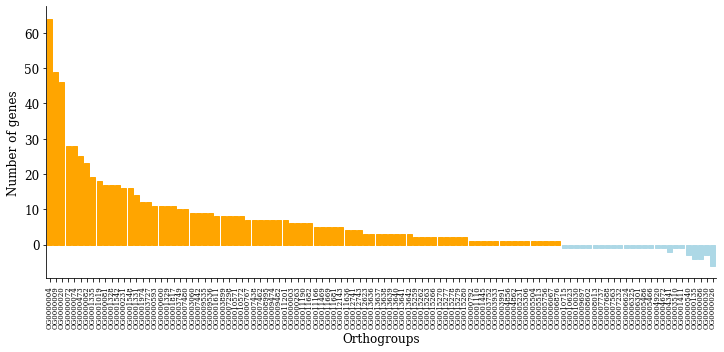

In [40]:
#Reading the file

#new = open("/Users/dshipilina/GitHub/GenomeVanessa/TopGO/BadiRate_summary.txt").read()
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/TopGO/BadiRate_summary.txt").read()
split_ = new.split('\n')
#print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns =["orthogroup", "N_genes"]
df3 = df3[:-1]
#df3 = df3.apply(pd.to_numeric, errors='coerce')
df3["N_genes"] = pd.to_numeric(df3["N_genes"], downcast="float")
df3


#Setting up aspect ratio and axes

ml.rcParams['figure.figsize'] = (12.0, 5.0)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Orthogroups")
plt.ylabel("Number of genes")

#Creating barplot

#plt.bar(x,y) #,hue=df3["N_genes"],palette="cool")
graph= sns.barplot(df3["orthogroup"],df3["N_genes"], color="#faab36") #df3["N_genes"])


#Setting up differential transparency

#df3["alpha"] = np.where(df3['N_genes']<0, 1.0, 0.05)
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 0.05], color= "#faab36")
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 1.0], color= "grey")
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 1.0], alpha=1.0)
#ax = sens.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in graph.patches:
    if bar.get_height() < 0:
        bar.set_color('lightblue')    
    else:
        bar.set_color('orange')


plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Orthogroups")
plt.ylabel("Number of genes")
#Graph is created and stored in the variable 'graph'
#graph = sns.barplot(x="sepal_width",y="petal_width",data=dataset)

#Drawing a horizontal line at y=0
#graph.axhline(0,linewidth=1,color="grey") #,style="_")

#Saving the figure
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/BadiRatestatsV2.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/BadiRatestatsV2.png",bbox_inches="tight")
plt.show()


#### Creating data frame for plotting window-based repeats

In [13]:
def make_repeat_df(path):
    new = open(path).read()
    split_ = new.split('\n')
    eigve_array=[]
    for i in split_:
        ii=re.split('\ |\t',i)
        eigve_array+=[ii]

    df4=pd.DataFrame(eigve_array[1:])
    df4.columns =["chrom", "begin", "end", "count_rpt", "length_rpt", "count_SINE","length_SINE", "count_DNA", "length_DNA", "count_TcM","length_TcM","count_LINE", "length_LINE", "count_LTR", "length_LTR", "count_nonLTR", "length_nonLTR"]
    df4 = df4[:-1]

    df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
    df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
    
    cols = df4.columns.drop('chrom')
    df4[cols] = df4[cols].apply(pd.to_numeric, errors='coerce')
    
    df4['block_len']=df4["end"]-df4["begin"]
    df4['per_length']=df4["length_rpt"]/df4['block_len']*100
    df4['per_nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    df4['per_LTRadd']=df4["length_LTR"]/df4['block_len']*100
    df4['per_DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    df4['per_SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    df4['per_LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
    
    return df4

In [16]:
make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensity/100k_counts/LR999928.1-repeat-count.out")

,chrom,begin,end,count_rpt,length_rpt,count_SINE,length_SINE,count_DNA,length_DNA,count_TcM,...,length_LTR,count_nonLTR,length_nonLTR,block_len,per_length,per_nonLTR,per_LTRadd,per_DNAtransadd,per_SINEadd,per_LINEadd
0,LR999928.1,1,100000,118,17373,8,1778,5,517,0,...,7948,13,3442,99999,17.373174,3.442034,7.948079,8.465085,10.243102,10.562106
1,LR999928.1,100001,200000,164,25045,25,4726,11,1460,0,...,8418,18,3966,99999,25.045250,3.966040,8.418084,9.878099,14.604146,15.255153
2,LR999928.1,200001,300000,189,27440,34,7538,12,1515,0,...,8110,13,3145,99999,27.440274,3.145031,8.110081,9.625096,17.163172,18.287183
3,LR999928.1,300001,400000,199,29241,42,8507,11,997,1,...,5345,26,4808,99999,29.241292,4.808048,5.345053,6.342063,14.849148,21.212212
4,LR999928.1,400001,500000,208,32433,32,5825,15,2237,0,...,8357,26,8140,99999,32.433324,8.140081,8.357084,10.594106,16.419164,19.596196
5,LR999928.1,500001,600000,216,27872,32,5718,23,2807,0,...,2745,17,2503,99999,27.872279,2.503025,2.745027,5.552056,11.270113,13.426134
6,LR999928.1,600001,700000,156,21099,37,6603,2,99,0,...,6052,18,5825,99999,21.099211,5.825058,6.052061,6.151062,12.754128,13.430134
7,LR999928.1,700001,800000,214,28823,53,10159,15,2549,4,...,5226,20,5036,99999,28.823288,5.036050,5.226052,7.775078,17.934179,19.399194
8,LR999928.1,800001,900000,175,27331,28,5522,13,1951,0,...,9389,21,3822,99999,27.331273,3.822038,9.389094,11.340113,16.862169,19.324193


In [19]:
make_repeat_df_newcol("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/LR999929.1-repeat-count.out")

ValueError: Length mismatch: Expected axis has 19 elements, new values have 17 elements

In [17]:
def make_repeat_df_newcol(path):
    new = open(path).read()
    split_ = new.split('\n')
    eigve_array=[]
    for i in split_:
        ii=re.split('\ |\t',i)
        eigve_array+=[ii]

    df4=pd.DataFrame(eigve_array[1:])
    #df4.columns =["chrom", "begin", "end", "count_rpt", "length_rpt", "count_SINE","length_SINE", "count_DNA", "length_DNA", "count_TcM","length_TcM","count_LINE", "length_LINE", "count_LTR", "length_LTR", "count_nonLTR", "length_nonLTR"]
    df4 = df4[:-1]

    df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
    df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
    
    cols = df4.columns.drop('chrom')
    df4[cols] = df4[cols].apply(pd.to_numeric, errors='coerce')
    
    df4['block_len']=df4["end"]-df4["begin"]
    df4['per_length']=df4["length_rpt"]/df4['block_len']*100
    df4['per_nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    df4['per_LTRadd']=df4["length_LTR"]/df4['block_len']*100
    df4['per_DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    df4['per_SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    df4['per_LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
    
    return df4

In [ ]:
### OLD VERSION ###

'''

def make_rep_df(path):
    new = open(path).read()
    split_ = new.split('\n')
#print(split_[1])
    eigve_array=[]
#print(split_file2[2])
    for i in split_:
    #print(i)
        ii=re.split('\ |\t',i)
    #print(ii)
        eigve_array+=[ii]

    df4=pd.DataFrame(eigve_array[1:])
    #df4 = df4[:]
    df4.columns =["chrom", "begin", "end", "count_rpt", "length_rpt", "count_SINE","length_SINE", "count_DNA", "length_DNA", "count_TcM","length_TcM","count_LINE", "length_LINE", "count_LTR", "length_LTR", "count_nonLTR", "length_nonLTR"]
    #df4 = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
    df4 = df4[:-1]
    df4 = df4[1:]
#df3['count_SINE'].fillna("0", inplace=True)
    df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
    df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
    df4 = df4.apply(pd.to_numeric, errors='coerce')
    df4['block_len']=df4["end"]-df4["begin"]
    df4['per_length']=df4["length_rpt"]/df4['block_len']*100
    df4['per_nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    df4['per_LTRadd']=df4["length_LTR"]/df4['block_len']*100
    df4['per_DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    df4['per_SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    df4['per_LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
    #df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
    #df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
    
    
    #sns.barplot(x=df["begin"], y=df["LINEsum"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["SINEsum"] , color="red")
    #sns.barplot(x=df["begin"], y=df["DNAsum"] , color="green")
    #sns.barplot(x=df["begin"], y=df["length_LTR"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["length_nonLTR"] , color="blue")
    
#df3.dtypes
    return df4

#### Plot repeat stacked bars

In [7]:
def plot_rep_stack_bar(df,mg_num,chrnum): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["per_length"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    plt.ylabel("% repeats")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    ax.set_ylim([0,80])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

In [6]:
def plot_rep_stack_bar_density(df,mg_num,chrnum): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["dens_length"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    sns.barplot(x=df["begin"], y=df["dens_LINEadd"] , color="purple")
    sns.barplot(x=df["begin"], y=df["dens_SINEadd"] , color="red")
    sns.barplot(x=df["begin"], y=df["dens_DNAtransadd"] , color="green")
    sns.barplot(x=df["begin"], y=df["dens_LTRadd"] , color="orange")
    sns.barplot(x=df["begin"], y=df["dens_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    plt.ylabel("% repeats")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    #ax.set_ylim([0,80])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

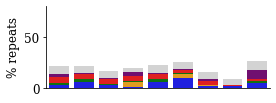

In [26]:
plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensity/100k_counts/LR999929.1-repeat-count.out"),4,"40")

In [15]:
plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/LR999929.1-repeat-count.out"),4,"40")

ValueError: Length mismatch: Expected axis has 19 elements, new values have 17 elements

In [16]:
make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/LR999929.1-repeat-count.out")

ValueError: Length mismatch: Expected axis has 19 elements, new values have 17 elements

#### Plotting window-based repeats

In [ ]:
import re
new = open("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3 = df3.rename(columns=df3.iloc[0]).drop(df3.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3 = df3[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
df3.loc[df3["length_SINE"] == '','length_SINE'] = 0
df3.loc[df3["length_TcM"] == '','length_TcM'] = 0
df3 = df3.apply(pd.to_numeric, errors='coerce')
df3['DNAsum']=df3["length_LTR"]+df3["length_DNA"]
df3['SINEsum']=df3["length_SINE"]+df3["DNAsum"]
df3['LINEsum']=df3["length_LINE"]+df3["SINEsum"]
#df3.dtypes
df3

In [ ]:
import re
new = open("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]

df4=pd.DataFrame(eigve_array)
df4 = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
df4 = df4.apply(pd.to_numeric, errors='coerce')
df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
df4

In [ ]:
make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out")
plt.savefig("/Users/dshipilina/GitHub/LR999928.1-repeat.pdf",bbox_inches="tight")

In [ ]:
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out"),17,"24")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out"),16.6,"25")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.3,"26")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999927.1-repeat.out"),16.1,"27")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out"),16,"28")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999929.1-repeat.out"),15.9,"29")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999930.1-repeat.out"),15.7,"30")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999931.1-repeat.out"),15.5,"31")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999932.1-repeat.out"),15.4,"32")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999933.1-repeat.out"),14.9,"33")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999934.1-repeat.out"),14.8,"34")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999935.1-repeat.out"),14.8,"35")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999936.1-repeat.out"),14.6,"36")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999937.1-repeat.out"),13.9,"37")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999938.1-repeat.out"),13.8,"38")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999939.1-repeat.out"),13.7,"39")

In [ ]:
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999940.1-repeat.out"),13.8,"40")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999941.1-repeat.out"),13.7,"41")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999942.1-repeat.out"),13.5,"42")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999943.1-repeat.out"),13.2,"43")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999944.1-repeat.out"),12.9,"44")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999945.1-repeat.out"),12.8,"45")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999946.1-repeat.out"),12.6,"46")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999947.1-repeat.out"),11.7,"47")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999948.1-repeat.out"),11.3,"48")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999949.1-repeat.out"),11.2,"49")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999950.1-repeat.out"),9.9,"50")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999951.1-repeat.out"),9.8,"51")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999952.1-repeat.out"),8.2,"52")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999953.1-repeat.out"),8.2,"53")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999954.1-repeat.out"),7.4,"54")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999955.1-repeat.out"),6.2,"55")

## Duplicated Genes Chromosome Total

In [ ]:
'''
import re
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/Gained_genes_per_chrom.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]
    
pd.read_csv('c:/~/trainSetRel3.txt', sep='\t')
'''

In [42]:
dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/Gained_genes_per_chrom.tsv", sep='\t', header=0)
dfr.columns =["chrom", "duplic_genes"]
dfr

,chrom,duplic_genes
0,LR999924.1,10
1,LR999925.1,27
2,LR999926.1,23
3,LR999927.1,48
4,LR999928.1,14
5,LR999929.1,19
6,LR999930.1,15
7,LR999931.1,8
8,LR999932.1,16
9,LR999933.1,13


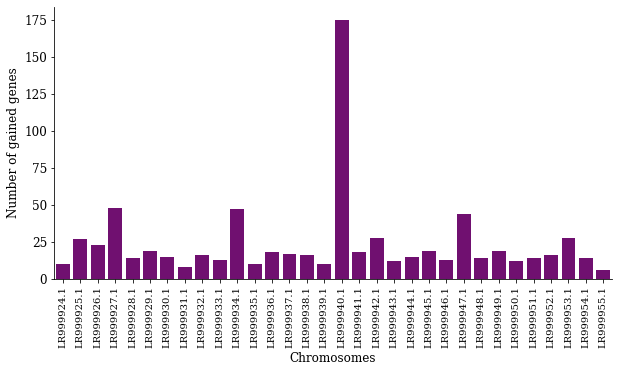

In [44]:
ml.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x=dfr["chrom"], y=dfr["duplic_genes"] , color="purple")
plt.xticks(rotation=90)
plt.xlabel("Chromosomes")
plt.ylabel("Number of gained genes")
plt.tick_params(axis='x', labelsize=10)
#plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/gained_genes.pdf",bbox_inches="tight")
#plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/gained_genes.jpg",bbox_inches="tight")

## Window-based gains plot

In [7]:
#dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv", sep="\t")
dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedGeneDensity/100kb_tmp_counts/LR999924.1-genecount.tsv", sep=" ")
#dfr.columns =["chrom", "begin", "end", "gained_genes"]
dfr

,chrom,begin,end,count_gene,length_gene
0,LR999924.1,1,100000,0,NaN
1,LR999924.1,100001,200000,2,16712.0
2,LR999924.1,200001,300000,2,17503.0
3,LR999924.1,300001,400000,5,9990.0
4,LR999924.1,400001,500000,4,31592.0
...,...,...,...,...,...
166,LR999924.1,16600001,16700000,4,13031.0
167,LR999924.1,16700001,16800000,0,NaN
168,LR999924.1,16800001,16900000,1,7402.0
169,LR999924.1,16900001,17000000,5,28169.0


In [ ]:
import re
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999925.1_gains.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

dfr=pd.DataFrame(eigve_array)
#dfr = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
dfr.columns=['chrom','begin','end','gains']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
#df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
#df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
#df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
dfr = dfr.apply(pd.to_numeric, errors='coerce')
#df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
#df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
#df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
dfr

In [ ]:

    ml.rcParams['figure.figsize'] = (17, 1.5)
    sns.barplot(x=dfr["begin"], y=dfr["gains"] , color="grey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("N genes")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    #sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    #sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    #sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    #plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    #plt.ylabel("% repeats")
    ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
    ax.set_ylim([0,10])
    ax.invert_yaxis()
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/repeat_25.jpg",bbox_inches="tight")
    plt.show()

In [ ]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

dfr=pd.DataFrame(eigve_array)
#dfr = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
dfr.columns=['chrom','begin','end','gains']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
#df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
#df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
#df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
dfr = dfr.apply(pd.to_numeric, errors='coerce')
#df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
#df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
#df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
dfr

In [ ]:
ml.rcParams['figure.figsize'] = (17, 1.5)
    sns.barplot(x=dfr["begin"], y=dfr["gains"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("N genes")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    #sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    #sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    #sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    #plt.ylabel("% repeats")
    ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
    ax.set_ylim([0,10])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

In [ ]:
ml.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x=dfr["chrom"], y=dfr["duplic_genes"] , color="purple")
plt.xticks(rotation=90)
plt.xlabel("Chromosomes")
plt.ylabel("Number of gained genes")
plt.tick_params(axis='x', labelsize=10)
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/gained_genes.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/gained_genes.jpg",bbox_inches="tight")

## Gene density

In [9]:
#dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv", sep="\t")
dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedGeneDensity/100kb_tmp_counts/LR999924.1-genecount.tsv", sep=" ")
#dfr.columns =["chrom", "begin", "end", "gained_genes"]
dfr['length_gene'] = dfr['length_gene'].fillna(0)
dfr['block_len']=dfr["end"]-dfr["begin"]
dfr['%length']=dfr["length_gene"]/dfr['block_len']*100
#dfr.fillna(0)
dfr

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedGeneDensity/100kb_tmp_counts/LR999924.1-genecount.tsv'

## NEW DATA FRAMER

In [10]:
dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/LR999924.1-repeat-count.out", sep=" ")
dfr2 = dfr2.fillna(0)
cols = dfr2.columns.drop('chrom')
dfr2[cols] = dfr2[cols].apply(pd.to_numeric, errors='coerce')
dfr2['block_len']=dfr2["end"]-dfr2["begin"]
#dfr2['per_length']=dfr2["length_rpt"]/dfr2['block_len']*100
#dfr2['per_nonLTR']=dfr2["length_nonLTR"]/dfr2['block_len']*100
#dfr2['per_LTRadd']=dfr2["length_LTR"]/dfr2['block_len']*100
#dfr2['per_DNAtransadd']=(dfr2["length_LTR"]+dfr2["length_DNA"])/dfr2['block_len']*100
#dfr2['per_SINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"])/dfr2['block_len']*100
#dfr2['per_LINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"]+dfr2["length_LINE"])/dfr2['block_len']*100

dfr2['dens_length']=dfr2["count_rpt"]/dfr2['block_len']*100000
dfr2['dens_nonLTR']=dfr2["count_nonLTR"]/dfr2['block_len']*100000
dfr2['dens_LTRadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"])/dfr2['block_len']*100000
dfr2['dens_DNAtransadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"])/dfr2['block_len']*100000
dfr2['dens_SINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"]+dfr2["count_"])/dfr2['block_len']*100000


#dfr['density_gene']=dfr["count_gene"]/dfr['block_len'] *100000
#dfr['density_gene_ex']=dfr["count_gene_ex"]/dfr['block_len'] *100000
dfr2

,chrom,begin,end,count_rpt,length_rpt,count_SINE,length_SINE,count_DNA,length_DNA,count_TcM,...,length_nonLTR,count_simple,length_simple,block_len,dens_length,dens_nonLTR,dens_LTRadd,dens_DNAtransadd,dens_SINEadd,dens_LINEadd
0,LR999924.1,1.0,100000.0,181,78340,0.0,0.0,22.0,2312.0,22.0,...,61056,44,3570,99999.0,181.00181,72.000720,72.000720,94.000940,94.000940,130.001300
1,LR999924.1,100001.0,200000.0,129,30952,4.0,1040.0,17.0,3193.0,7.0,...,14690,25,1617,99999.0,129.00129,19.000190,22.000220,39.000390,43.000430,54.000540
2,LR999924.1,200001.0,300000.0,66,7205,8.0,1518.0,6.0,476.0,0.0,...,2184,27,1164,99999.0,66.00066,7.000070,7.000070,13.000130,21.000210,22.000220
3,LR999924.1,300001.0,400000.0,58,6967,7.0,1335.0,4.0,1692.0,0.0,...,1325,11,458,99999.0,58.00058,8.000080,11.000110,15.000150,22.000220,24.000240
4,LR999924.1,400001.0,500000.0,80,7049,8.0,1691.0,2.0,404.0,0.0,...,901,44,1732,99999.0,80.00080,5.000050,5.000050,7.000070,15.000150,19.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,LR999924.1,16600000.0,16700000.0,120,18342,23.0,4095.0,5.0,1837.0,0.0,...,5566,20,747,100000.0,120.00000,14.000000,16.000000,21.000000,44.000000,53.000000
167,LR999924.1,16700000.0,16800000.0,98,10182,11.0,1582.0,10.0,1445.0,0.0,...,1968,33,1193,100000.0,98.00000,11.000000,12.000000,22.000000,33.000000,34.000000
168,LR999924.1,16800000.0,16900000.0,81,11760,12.0,2517.0,6.0,723.0,0.0,...,4352,18,533,100000.0,81.00000,12.000000,12.000000,18.000000,30.000000,31.000000
169,LR999924.1,16900000.0,17000000.0,51,6572,3.0,842.0,7.0,2467.0,0.0,...,637,26,1162,100000.0,51.00000,5.000000,6.000000,13.000000,16.000000,17.000000


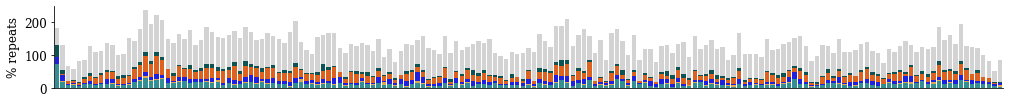

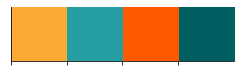

In [22]:
#plot_rep_stack_bar(dfr2,17,'24')
plot_rep_stack_bar_density(dfr2,17)
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

In [120]:
def plot_rep_stack_bar_density(df,Mb_num): 
#def plot_rep_stack_bar_density(df,Mb_num,chrnum):
    ml.rcParams['figure.figsize'] = (Mb_num, 1.5)
    #sns.barplot(x=df["begin"], y=df["dens_length"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    sns.barplot(x=df["begin"], y=df["dens_LINEadd"] , color="#005f60")
    sns.barplot(x=df["begin"], y=df["dens_SINEadd"] , color="#fd5900")
    sns.barplot(x=df["begin"], y=df["dens_DNAtransadd"] , color="blue")
    sns.barplot(x=df["begin"], y=df["dens_LTRadd"] , color="yellow")
    sns.barplot(x=df["begin"], y=df["dens_nonLTR"] , color="#249ea0")
    
    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    plt.ylabel("% repeats")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    ax.set_ylim([0,200])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

In [ ]:
def plot_rep_stack_bar(df,mg_num,chrnum): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["per_length"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    plt.ylabel("% repeats")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    ax.set_ylim([0,80])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

In [8]:
#dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv", sep="\t")
dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedGeneExpansionDensity/LR999924.1-geneexpcount.tsv", sep=" ")
#dfr.columns =["chrom", "begin", "end", "gained_genes"]
dfr2['length_gene_ex'] = dfr2['length_gene_ex'].fillna(0)
dfr2['block_len_ex']=dfr2["end"]-dfr2["begin"]
dfr2['%length']=dfr2["length_gene_ex"]/dfr2['block_len_ex']*100
#dfr.fillna(0)
dfr2

,chrom,begin,end,count_gene_ex,length_gene_ex,block_len_ex,%length
0,LR999924.1,1,100000,0,0.0,99999,0.0
1,LR999924.1,100001,200000,0,0.0,99999,0.0
2,LR999924.1,200001,300000,0,0.0,99999,0.0
3,LR999924.1,300001,400000,0,0.0,99999,0.0
4,LR999924.1,400001,500000,0,0.0,99999,0.0
...,...,...,...,...,...,...,...
166,LR999924.1,16600001,16700000,0,0.0,99999,0.0
167,LR999924.1,16700001,16800000,0,0.0,99999,0.0
168,LR999924.1,16800001,16900000,0,0.0,99999,0.0
169,LR999924.1,16900001,17000000,0,0.0,99999,0.0


In [56]:
dfr2[25:45]

,chrom,begin,end,count_gene_ex,length_gene_ex,block_len_ex,%length
25,LR999924.1,2500001,2600000,0,0.0,99999,0.000000
26,LR999924.1,2600001,2700000,0,0.0,99999,0.000000
27,LR999924.1,2700001,2800000,0,0.0,99999,0.000000
28,LR999924.1,2800001,2900000,0,0.0,99999,0.000000
29,LR999924.1,2900001,3000000,0,0.0,99999,0.000000
30,LR999924.1,3000001,3100000,0,0.0,99999,0.000000
31,LR999924.1,3100001,3200000,0,0.0,99999,0.000000
32,LR999924.1,3200001,3300000,0,0.0,99999,0.000000
33,LR999924.1,3300001,3400000,0,0.0,99999,0.000000
34,LR999924.1,3400001,3500000,0,0.0,99999,0.000000


In [13]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = False

Text(0, 0.5, 'N genes')

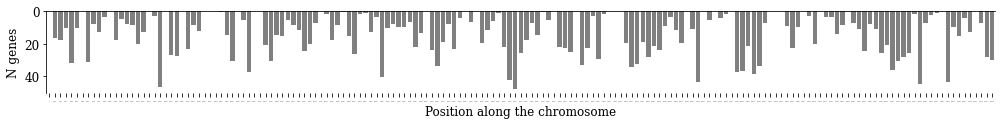

In [26]:
ml.rcParams['figure.figsize'] = (17, 1.5)

# Plotting gene density
sns.barplot(x=dfr["begin"], y=dfr["%length"] , color="lightgrey")
plt.tick_params(axis='x', labelsize=1)
ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
#ax.set_ylim([0,10])
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = False
ax.invert_yaxis()

# Plotting gains density
sns.barplot(x=dfr["begin"], y=dfr["%length"] , color="grey")
plt.xlabel("Position along the chromosome")
plt.ylabel("N genes")

#plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/Figures/gene_dens_Z.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/Figures/gene_dens_Z.png",bbox_inches="tight")

In [ ]:
/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/LR999924.1-geneFullcount.tsv

In [4]:
#dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv", sep="\t")
dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/LR999924.1-geneFullcount.tsv", sep=" ")
#dfr.columns =["chrom", "begin", "end", "gained_genes"]
dfr['block_len']=dfr["end"]-dfr["begin"]

dfr['length_gene_ex'] = dfr['length_gene_ex'].fillna(0)
dfr['length_gene'] = dfr['length_gene'].fillna(0)

#dfr2['block_len_ex']=dfr2["end"]-dfr2["begin"]
dfr['%length']=dfr["length_gene_ex"]/dfr['block_len']*100

dfr['block_len']=dfr["end"]-dfr["begin"]
dfr['%length']=dfr["length_gene"]/dfr['block_len']*100
dfr['density_gene']=dfr["count_gene"]/dfr['block_len'] *100000
dfr['density_gene_ex']=dfr["count_gene_ex"]/dfr['block_len'] *100000
dfr=dfr.drop(columns=['chrom.1','begin.1','end.1'])
#dfr.fillna(0)
dfr

,chrom,begin,end,count_gene,length_gene,count_gene_ex,length_gene_ex,block_len,%length,density_gene,density_gene_ex
0,LR999924.1,1,100000,0,0.0,0,0.0,99999,0.000000,0.00000,0.0
1,LR999924.1,100001,200000,2,16712.0,0,0.0,99999,16.712167,2.00002,0.0
2,LR999924.1,200001,300000,2,17503.0,0,0.0,99999,17.503175,2.00002,0.0
3,LR999924.1,300001,400000,5,9990.0,0,0.0,99999,9.990100,5.00005,0.0
4,LR999924.1,400001,500000,4,31592.0,0,0.0,99999,31.592316,4.00004,0.0
...,...,...,...,...,...,...,...,...,...,...,...
166,LR999924.1,16600001,16700000,4,13031.0,0,0.0,99999,13.031130,4.00004,0.0
167,LR999924.1,16700001,16800000,0,0.0,0,0.0,99999,0.000000,0.00000,0.0
168,LR999924.1,16800001,16900000,1,7402.0,0,0.0,99999,7.402074,1.00001,0.0
169,LR999924.1,16900001,17000000,5,28169.0,0,0.0,99999,28.169282,5.00005,0.0


In [ ]:
def gene_density()


paste -d " " LR999924.1-genecount.tsv LR999924.1-geneexpcount.tsv > LR999924.1-geneFullcount.tsv

## Creating multi dataframe (3 files)

In [28]:
#Load repeats
dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999924.1-repeat-count.out", sep=" ")
dfr2 = dfr2.fillna(0)
cols = dfr2.columns.drop('chrom')
dfr2[cols] = dfr2[cols].apply(pd.to_numeric, errors='coerce')
dfr2['block_len']=dfr2["end"]-dfr2["begin"]

#Calculate occupied length and density
#Sum up values for stacked bar plot
dfr2['per_length']=dfr2["length_rpt"]/dfr2['block_len']*100
dfr2['per_nonLTR']=dfr2["length_nonLTR"]/dfr2['block_len']*100
dfr2['per_LTRadd']=dfr2["length_LTR"]/dfr2['block_len']*100
dfr2['per_DNAtransadd']=(dfr2["length_LTR"]+dfr2["length_DNA"])/dfr2['block_len']*100
dfr2['per_SINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"])/dfr2['block_len']*100
dfr2['per_LINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"]+dfr2["length_LINE"])/dfr2['block_len']*100

dfr2['dens_length']=dfr2["count_rpt"]/dfr2['block_len']*100000
dfr2['dens_nonLTR']=dfr2["count_nonLTR"]/dfr2['block_len']*100000
dfr2['dens_LTRadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"])/dfr2['block_len']*100000
dfr2['dens_DNAtransadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"])/dfr2['block_len']*100000
dfr2['dens_SINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"]+dfr2["count_simple"])/dfr2['block_len']*100000

#Loading gene counts, calculating occupied length
dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999924.1-genecount.tsv", sep=" ")
dfr['length_gene'] = dfr['length_gene'].fillna(0)
dfr['per_length_gene']=dfr["length_gene"]/dfr2['block_len']*100
dfr['density_gene']=dfr["count_gene"]/dfr2['block_len'] *100000

#Loading gained gene counts, calculating occupied length
dfr3=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999924.1-geneexpcount.tsv", sep=" ")
dfr3['length_gene_ex'] = dfr3['length_gene_ex'].fillna(0)
dfr3['per_length_gene_ex']=dfr3["length_gene_ex"]/dfr2['block_len']*100
dfr3['density_gene_ex']=dfr3["count_gene_ex"]/dfr2['block_len'] *100000

#Combining three tables
dfr2['count_gene']=dfr['count_gene']
dfr2['density_gene']=dfr['count_gene']
dfr2['length_gene']=dfr['length_gene']
dfr2['per_length_gene']=dfr['per_length_gene']

dfr2['count_gene_ex']=dfr3['count_gene_ex']
dfr2['density_gene_ex']=dfr3['count_gene_ex']
dfr2['length_gene_ex']=dfr3['length_gene_ex']
dfr2['per_length_gene_ex']=dfr3['per_length_gene_ex']

#Saving merged table
dfr2.to_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999924.1-counts-merged.tsv", sep="\t")

dfr2

,chrom,begin,end,count_rpt,length_rpt,count_SINE,length_SINE,count_DNA,length_DNA,count_TcM,...,dens_SINEadd,dens_LINEadd,count_gene,density_gene,length_gene,per_length_gene,count_gene_ex,density_gene_ex,length_gene_ex,per_length_gene_ex
0,LR999924.1,1.0,100000.0,181,78340,0.0,0.0,22.0,2312.0,22.0,...,94.000940,174.001740,0,0,0.0,0.000000,0,0,0.0,0.0
1,LR999924.1,100001.0,200000.0,129,30952,4.0,1040.0,17.0,3193.0,7.0,...,43.000430,79.000790,2,2,16712.0,16.712167,0,0,0.0,0.0
2,LR999924.1,200001.0,300000.0,66,7205,8.0,1518.0,6.0,476.0,0.0,...,21.000210,49.000490,2,2,17503.0,17.503175,0,0,0.0,0.0
3,LR999924.1,300001.0,400000.0,58,6967,7.0,1335.0,4.0,1692.0,0.0,...,22.000220,35.000350,5,5,9990.0,9.990100,0,0,0.0,0.0
4,LR999924.1,400001.0,500000.0,80,7049,8.0,1691.0,2.0,404.0,0.0,...,15.000150,63.000630,4,4,31592.0,31.592316,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,LR999924.1,16600000.0,16700000.0,120,18342,23.0,4095.0,5.0,1837.0,0.0,...,44.000000,73.000000,4,4,13031.0,13.031000,0,0,0.0,0.0
167,LR999924.1,16700000.0,16800000.0,98,10182,11.0,1582.0,10.0,1445.0,0.0,...,33.000000,67.000000,0,0,0.0,0.000000,0,0,0.0,0.0
168,LR999924.1,16800000.0,16900000.0,81,11760,12.0,2517.0,6.0,723.0,0.0,...,30.000000,49.000000,1,1,7402.0,7.402000,0,0,0.0,0.0
169,LR999924.1,16900000.0,17000000.0,51,6572,3.0,842.0,7.0,2467.0,0.0,...,16.000000,43.000000,5,5,28169.0,28.169000,0,0,0.0,0.0


In [30]:
#Load repeats
dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999925.1-repeat-count.out", sep=" ")
dfr2 = dfr2.fillna(0)
cols = dfr2.columns.drop('chrom')
dfr2[cols] = dfr2[cols].apply(pd.to_numeric, errors='coerce')
dfr2['block_len']=dfr2["end"]-dfr2["begin"]

#Calculate occupied length and density
#Sum up values for stacked bar plot
dfr2['per_length']=dfr2["length_rpt"]/dfr2['block_len']*100
dfr2['per_nonLTR']=dfr2["length_nonLTR"]/dfr2['block_len']*100
dfr2['per_LTRadd']=dfr2["length_LTR"]/dfr2['block_len']*100
dfr2['per_DNAtransadd']=(dfr2["length_LTR"]+dfr2["length_DNA"])/dfr2['block_len']*100
dfr2['per_SINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"])/dfr2['block_len']*100
dfr2['per_LINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"]+dfr2["length_LINE"])/dfr2['block_len']*100

dfr2['dens_length']=dfr2["count_rpt"]/dfr2['block_len']*100000
dfr2['dens_nonLTR']=dfr2["count_nonLTR"]/dfr2['block_len']*100000
dfr2['dens_LTRadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"])/dfr2['block_len']*100000
dfr2['dens_DNAtransadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"])/dfr2['block_len']*100000
dfr2['dens_SINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"])/dfr2['block_len']*100000
dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"]+dfr2["count_simple"])/dfr2['block_len']*100000

#Loading gene counts, calculating occupied length
dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999925.1-genecount.tsv", sep=" ")
dfr['length_gene'] = dfr['length_gene'].fillna(0)
dfr['per_length_gene']=dfr["length_gene"]/dfr2['block_len']*100
dfr['density_gene']=dfr["count_gene"]/dfr2['block_len'] *100000

#Loading gained gene counts, calculating occupied length
dfr3=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999925.1-geneexpcount.tsv", sep=" ")
dfr3['length_gene_ex'] = dfr3['length_gene_ex'].fillna(0)
dfr3['per_length_gene_ex']=dfr3["length_gene_ex"]/dfr2['block_len']*100
dfr3['density_gene_ex']=dfr3["count_gene_ex"]/dfr2['block_len'] *100000

#Combining three tables
dfr2['count_gene']=dfr['count_gene']
dfr2['density_gene']=dfr['count_gene']
dfr2['length_gene']=dfr['length_gene']
dfr2['per_length_gene']=dfr['per_length_gene']

dfr2['count_gene_ex']=dfr3['count_gene_ex']
dfr2['density_gene_ex']=dfr3['count_gene_ex']
dfr2['length_gene_ex']=dfr3['length_gene_ex']
dfr2['per_length_gene_ex']=dfr3['per_length_gene_ex']

#Saving merged table
#dfr2.to_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999925.1-counts-merged.tsv", sep="\t")
dfr2

,chrom,begin,end,count_rpt,length_rpt,count_SINE,length_SINE,count_DNA,length_DNA,count_TcM,...,dens_SINEadd,dens_LINEadd,count_gene,density_gene,length_gene,per_length_gene,count_gene_ex,density_gene_ex,length_gene_ex,per_length_gene_ex
0,LR999925.1,1.0,100000.0,125,20744,8.0,1099.0,11.0,1791.0,3.0,...,44.000440,83.000830,2,2,3030.0,3.030030,0,0,0.0,0.000000
1,LR999925.1,100001.0,200000.0,147,34543,11.0,1914.0,7.0,2029.0,2.0,...,43.000430,86.000860,2,2,9285.0,9.285093,2,2,9285.0,9.285093
2,LR999925.1,200001.0,300000.0,182,32161,27.0,5176.0,11.0,880.0,0.0,...,66.000660,113.001130,1,1,314.0,0.314003,1,1,314.0,0.314003
3,LR999925.1,300001.0,400000.0,169,28686,39.0,6329.0,13.0,5419.0,0.0,...,80.000800,115.001150,1,1,140.0,0.140001,0,0,0.0,0.000000
4,LR999925.1,400001.0,500000.0,191,21704,40.0,7128.0,12.0,1672.0,3.0,...,80.000800,128.001280,1,1,3480.0,3.480035,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,LR999925.1,16200000.0,16300000.0,135,13890,22.0,3903.0,8.0,671.0,0.0,...,46.000000,86.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
163,LR999925.1,16300000.0,16400000.0,121,19163,19.0,3796.0,2.0,55.0,0.0,...,36.000000,68.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
164,LR999925.1,16400000.0,16500000.0,114,15848,11.0,1794.0,9.0,622.0,3.0,...,36.000000,76.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
165,LR999925.1,16500000.0,16600000.0,121,27044,5.0,1072.0,6.0,1776.0,1.0,...,36.000000,86.000000,11,11,28852.0,28.852000,0,0,0.0,0.000000


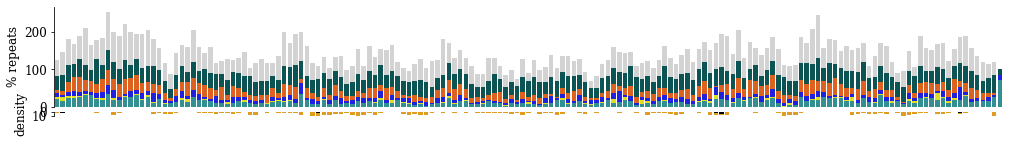

In [64]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

#plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensity/100k_counts/LR999929.1-repeat-count.out"),4,"40")
# Plotting gene density

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

from matplotlib import gridspec
spec = gridspec.GridSpec(ncols=1, nrows=2, hspace=0.1, height_ratios=[25, 1])

 
#ax0 = fig.add_subplot(spec[0])

fig = plt.figure(figsize=(17,2))
ax = fig.add_subplot(spec[1])
sns.barplot(x=dfr2["begin"], y=dfr2["density_gene"], color="orange")
sns.barplot(x=dfr2["begin"], y=dfr2["density_gene_ex"], color="black")
ax.axes.xaxis.set_ticks([])
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylim([0,10])
ax.invert_yaxis()
plt.xlabel("Position along the chromosome")
plt.ylabel("density")
    
    
ax2 = fig.add_subplot(spec[0])
plot_rep_stack_bar_density(dfr2,17)

In [130]:
def combined_plot(dfr2,chr_len):
    
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False

    spec = gridspec.GridSpec(ncols=1, nrows=2, hspace=0.1, height_ratios=[25, 1])
    
    pltlen=chr_len/1000000
    fig = plt.figure(figsize=(pltlen,2))
    ax = fig.add_subplot(spec[1])
    sns.barplot(x=dfr2["begin"], y=dfr2["density_gene"], color="black")
    sns.barplot(x=dfr2["begin"], y=dfr2["density_gene_ex"], color="orange")
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    ax.set_ylim([0,10])
    ax.invert_yaxis()
    #plt.xlabel("Position along the chromosome")
    plt.ylabel("density")
    
    
    ax2 = fig.add_subplot(spec[0])
    plot_rep_stack_bar_density(dfr2,pltlen)
    
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")

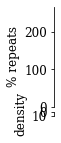

In [114]:
combined_plot(dfr2,17)

In [104]:
def combined_dataframe(chr_code):   
    #Load repeats
    dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/"+chr_code+"-repeat-count.out", sep=" ")
    dfr2 = dfr2.fillna(0)
    cols = dfr2.columns.drop('chrom')
    dfr2[cols] = dfr2[cols].apply(pd.to_numeric, errors='coerce')
    dfr2['block_len']=dfr2["end"]-dfr2["begin"]

    #Calculate occupied length and density
    #Sum up values for stacked bar plot
    dfr2['per_length']=dfr2["length_rpt"]/dfr2['block_len']*100
    dfr2['per_nonLTR']=dfr2["length_nonLTR"]/dfr2['block_len']*100
    dfr2['per_LTRadd']=dfr2["length_LTR"]/dfr2['block_len']*100
    dfr2['per_DNAtransadd']=(dfr2["length_LTR"]+dfr2["length_DNA"])/dfr2['block_len']*100
    dfr2['per_SINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"])/dfr2['block_len']*100
    dfr2['per_LINEadd']=(dfr2["length_LTR"]+dfr2["length_DNA"]+dfr2["length_SINE"]+dfr2["length_LINE"])/dfr2['block_len']*100

    dfr2['dens_length']=dfr2["count_rpt"]/dfr2['block_len']*100000
    dfr2['dens_nonLTR']=dfr2["count_nonLTR"]/dfr2['block_len']*100000
    dfr2['dens_LTRadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"])/dfr2['block_len']*100000
    dfr2['dens_DNAtransadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"])/dfr2['block_len']*100000
    dfr2['dens_SINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"])/dfr2['block_len']*100000
    dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"])/dfr2['block_len']*100000
    dfr2['dens_LINEadd']=(dfr2["count_nonLTR"]+dfr2["count_LTR"]+dfr2["count_DNA"]+dfr2["count_SINE"]+dfr2["count_LINE"]+dfr2["count_simple"])/dfr2['block_len']*100000

    #Loading gene counts, calculating occupied length
    dfr=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/"+chr_code+"-genecount.tsv", sep=" ")
    dfr['length_gene'] = dfr['length_gene'].fillna(0)
    dfr['per_length_gene']=dfr["length_gene"]/dfr2['block_len']*100
    dfr['density_gene']=dfr["count_gene"]/dfr2['block_len'] *100000

    #Loading gained gene counts, calculating occupied length
    dfr3=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/"+chr_code+"-geneexpcount.tsv", sep=" ")
    dfr3['length_gene_ex'] = dfr3['length_gene_ex'].fillna(0)
    dfr3['per_length_gene_ex']=dfr3["length_gene_ex"]/dfr2['block_len']*100
    dfr3['density_gene_ex']=dfr3["count_gene_ex"]/dfr2['block_len'] *100000

    #Combining three tables
    dfr2['count_gene']=dfr['count_gene']
    dfr2['density_gene']=dfr['count_gene']
    dfr2['length_gene']=dfr['length_gene']
    dfr2['per_length_gene']=dfr['per_length_gene']

    dfr2['count_gene_ex']=dfr3['count_gene_ex']
    dfr2['density_gene_ex']=dfr3['count_gene_ex']
    dfr2['length_gene_ex']=dfr3['length_gene_ex']
    dfr2['per_length_gene_ex']=dfr3['per_length_gene_ex']

    #Saving merged table
    #dfr2.to_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/JointAnalysis/LR999925.1-counts-merged.tsv", sep="\t")
    return dfr2

combined_dataframe("LR999925.1")

,chrom,begin,end,count_rpt,length_rpt,count_SINE,length_SINE,count_DNA,length_DNA,count_TcM,...,dens_SINEadd,dens_LINEadd,count_gene,density_gene,length_gene,per_length_gene,count_gene_ex,density_gene_ex,length_gene_ex,per_length_gene_ex
0,LR999925.1,1.0,100000.0,125,20744,8.0,1099.0,11.0,1791.0,3.0,...,44.000440,83.000830,2,2,3030.0,3.030030,0,0,0.0,0.000000
1,LR999925.1,100001.0,200000.0,147,34543,11.0,1914.0,7.0,2029.0,2.0,...,43.000430,86.000860,2,2,9285.0,9.285093,2,2,9285.0,9.285093
2,LR999925.1,200001.0,300000.0,182,32161,27.0,5176.0,11.0,880.0,0.0,...,66.000660,113.001130,1,1,314.0,0.314003,1,1,314.0,0.314003
3,LR999925.1,300001.0,400000.0,169,28686,39.0,6329.0,13.0,5419.0,0.0,...,80.000800,115.001150,1,1,140.0,0.140001,0,0,0.0,0.000000
4,LR999925.1,400001.0,500000.0,191,21704,40.0,7128.0,12.0,1672.0,3.0,...,80.000800,128.001280,1,1,3480.0,3.480035,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,LR999925.1,16200000.0,16300000.0,135,13890,22.0,3903.0,8.0,671.0,0.0,...,46.000000,86.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
163,LR999925.1,16300000.0,16400000.0,121,19163,19.0,3796.0,2.0,55.0,0.0,...,36.000000,68.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
164,LR999925.1,16400000.0,16500000.0,114,15848,11.0,1794.0,9.0,622.0,3.0,...,36.000000,76.000000,0,0,0.0,0.000000,0,0,0.0,0.000000
165,LR999925.1,16500000.0,16600000.0,121,27044,5.0,1072.0,6.0,1776.0,1.0,...,36.000000,86.000000,11,11,28852.0,28.852000,0,0,0.0,0.000000


## Plotting all chromosomes

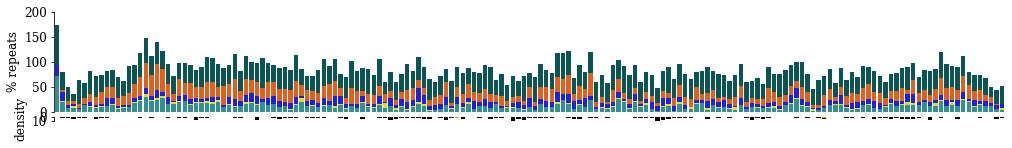

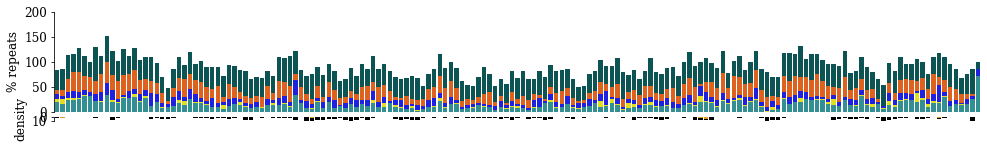

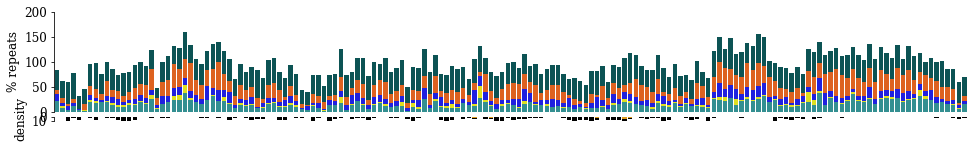

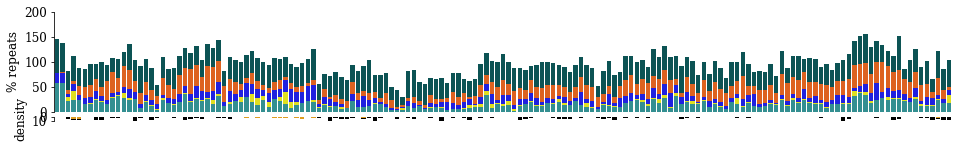

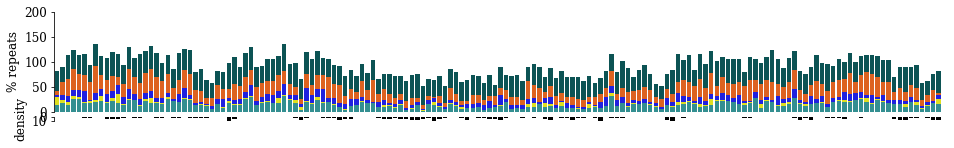

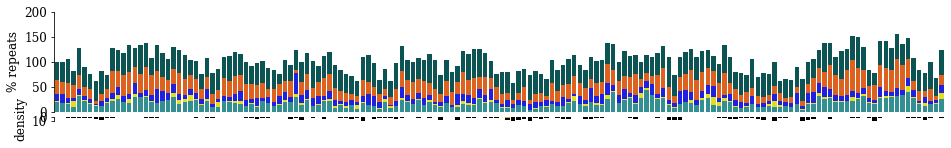

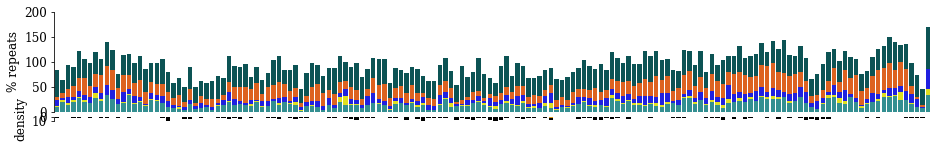

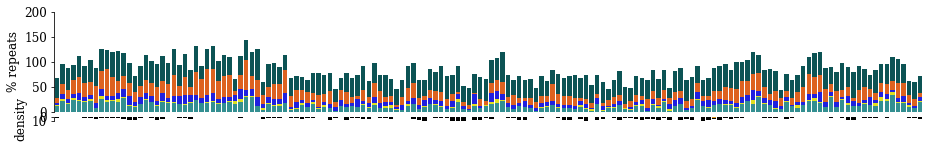

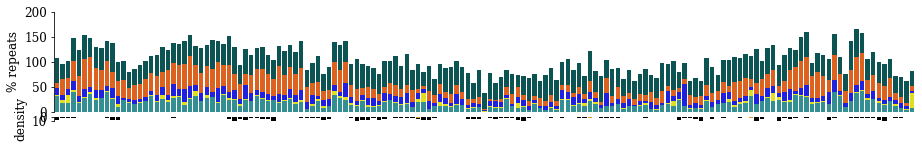

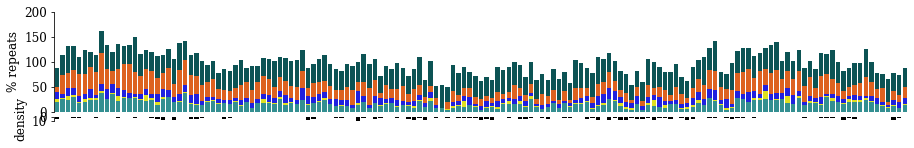

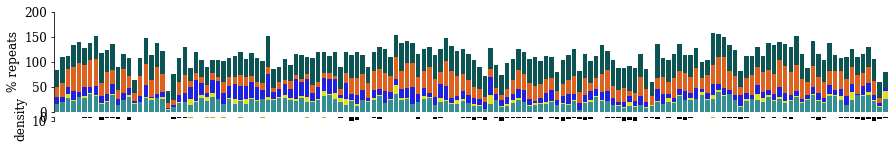

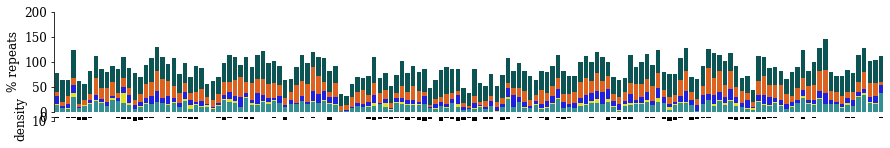

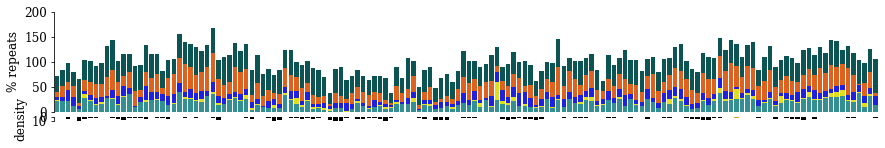

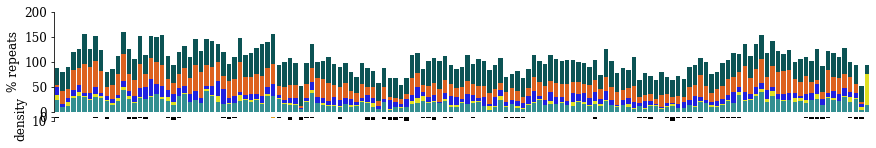

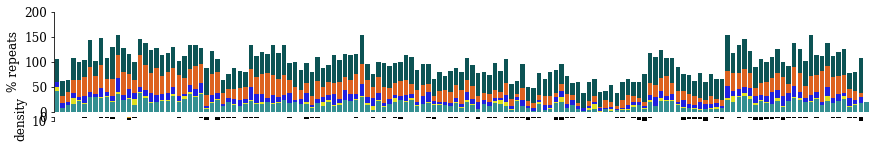

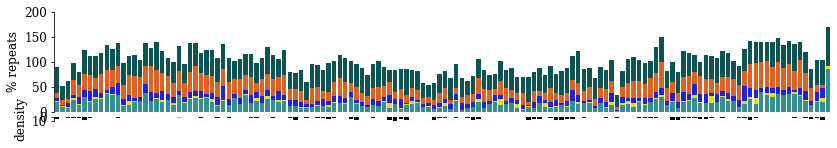

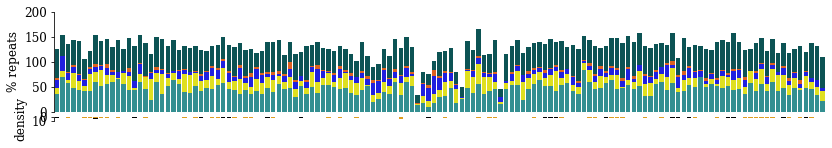

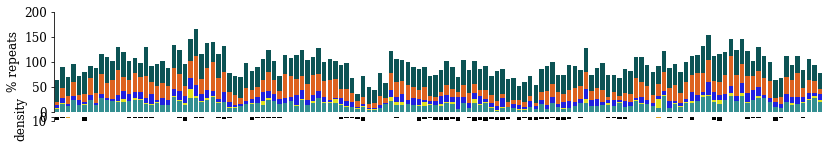

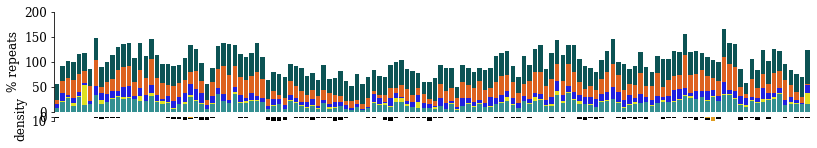

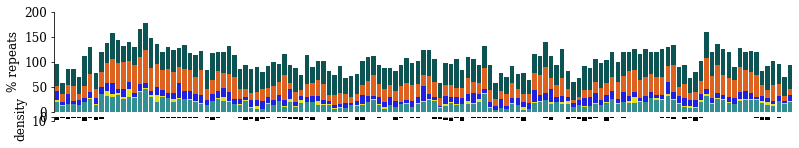

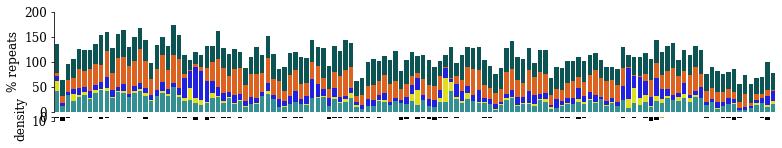

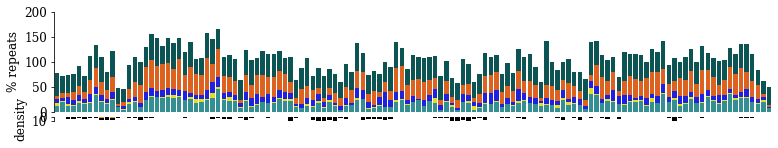

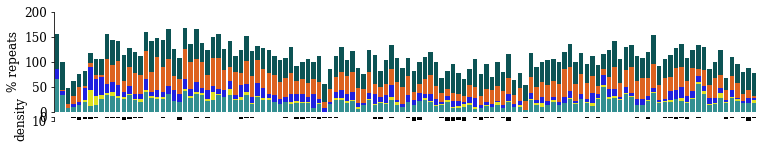

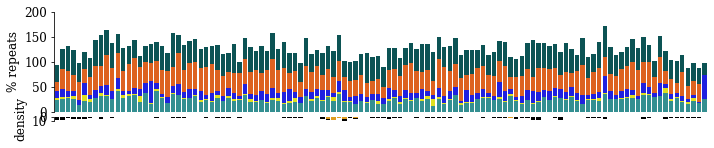

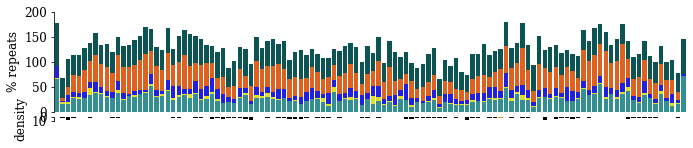

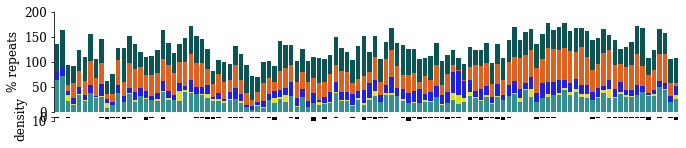

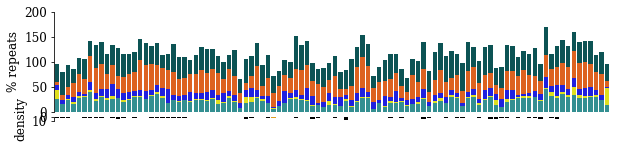

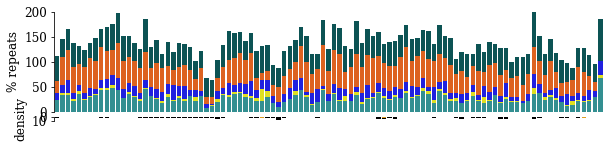

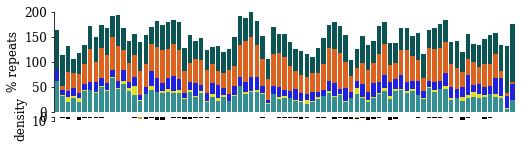

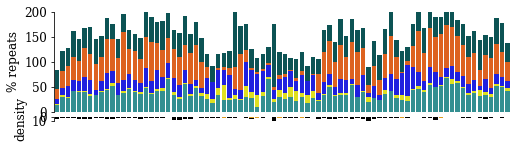

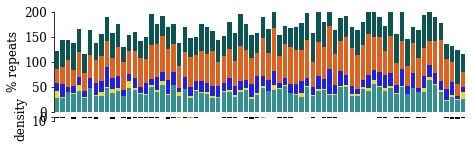

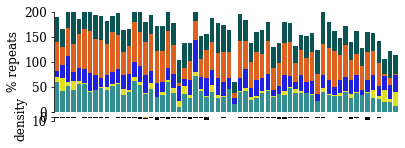

In [135]:
#Loading index
dfind=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/vanessa.index", sep=" ")
a=dfind.values

#plot Z, 34 or other cluster, W

for i in a:
    #print(i[0])
    combined_plot(combined_dataframe(i[0]),i[1])


### Combining plots

KeyError: 'dens_length'

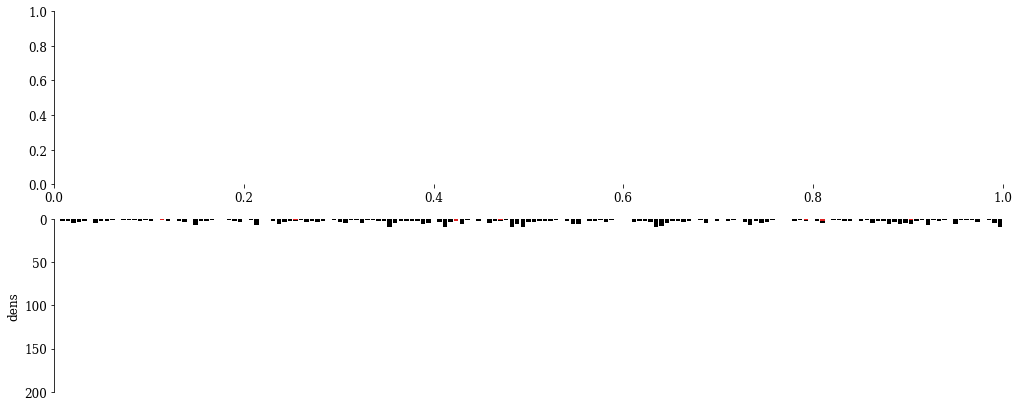

In [9]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

#plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensity/100k_counts/LR999929.1-repeat-count.out"),4,"40")
# Plotting gene density

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(2,1,2)
sns.barplot(x=dfr["begin"], y=dfr["density_gene"], color="black")
sns.barplot(x=dfr["begin"], y=dfr["density_gene_ex"], color="red")
ax.axes.xaxis.set_ticks([])
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylim([0,200])
ax.invert_yaxis()
plt.xlabel("Position along the chromosome")
plt.ylabel("dens")
    
    
ax2 = fig.add_subplot(2,1,1)
plot_rep_stack_bar_density(dfr2,17)


#plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensity/100k_counts/LR999929.1-repeat-count.out"),4,"40")
#plot_rep_stack_bar(make_repeat_df("/Users/dshipilina/GitHub/GenomeVanessa/WindowBasedAnalysis/WindowedRepeatDensityLocal/LR999929.1-repeat-count.out"),4,"40")

#sns.barplot(x=dfr["begin"][40:49], y=dfr["%length"][40:49] , color="lightgrey")
#plt.tick_params(axis='x', labelsize=1)
#ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
#ax.axes.xaxis.set_ticks([])
#x_axis = ax.axes.get_xaxis()
#x_axis.set_visible(False)
#ax.set_ylim([0,10])
#ax.invert_yaxis()

# Plotting gains density
#sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
#plt.xlabel("Position along the chromosome")
#plt.ylabel("N genes")

In [ ]:
result = pd.merge(left, right, on="key")

KeyError: '%length'

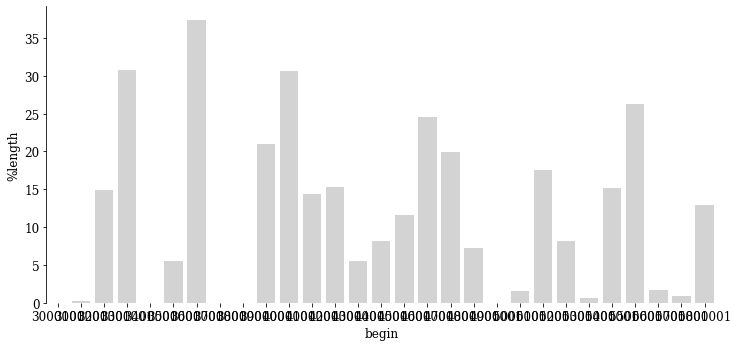

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,1)
sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
    
    
ax2 = fig.add_subplot(2,1,2)
sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")

Text(0.5, 0.5, 'subplot 111')

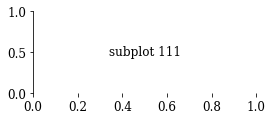

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
coord = 111
plt.subplot(coord)
plt.annotate('subplot ' + str(coord), xy = (0.5, 0.5), va = 'center', ha = 'center')

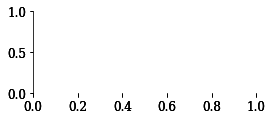

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure(100)
fig.add_subplot(111)
fig.add_subplot(111)
fig.add_subplot(111)

plt.show()

<AxesSubplot:>

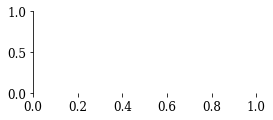

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(111)
#plt.annotate('subplot ' + str(coord), xy = (0.5, 0.5), va = 'center', ha = 'center')

<AxesSubplot:xlabel='begin', ylabel='%length'>

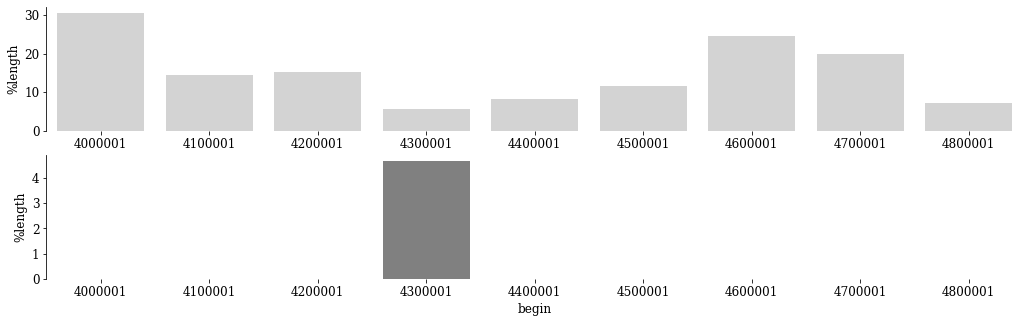

In [81]:
fig = plt.figure(figsize=(17.5, 5))
#plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
sns.barplot(x=dfr["begin"][40:49], y=dfr["%length"][40:49] , color="lightgrey")

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2) # two rows, two columns, second cell
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")

# Create third axes, a combination of third and fourth cell
#sub3 = fig.add_subplot(2,1,2)
#sub3 = fig.add_subplot(2,1,3)#(3,4)) # two rows, two colums, combined third and fourth cell


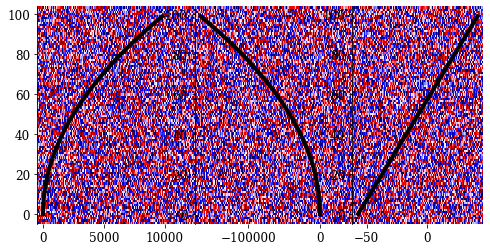

In [84]:
y_values = np.arange(0, 100, 1)
two_d_array = np.random.random((100,1000))
x_1 = y_values**2
x_2 = y_values - 17 * y_values**2
x_3 = y_values - 57


fig, ax0 = plt.subplots(figsize=(8,4))
ax0.pcolormesh(two_d_array, cmap = 'seismic')
ax0.set_axis_off()

gs0 = ml.gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec=ax0)
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])
ax3 = fig.add_subplot(gs0[2])

for ax in [ax1, ax2, ax3]:
    ax.patch.set_visible(False)

ax1.plot(x_1, y_values, color = 'k', linewidth = 4)
ax2.plot(x_2, y_values, color = 'k', linewidth = 4)
ax3.plot(x_3, y_values, color = 'k', linewidth = 4)


plt.show()

<Figure size 1260x360 with 0 Axes>

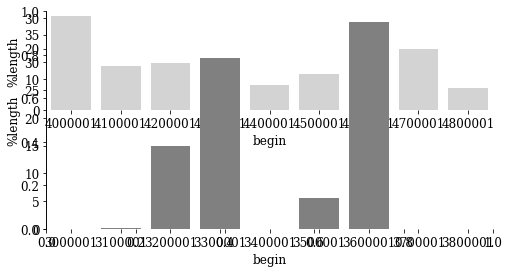

<AxesSubplot:xlabel='begin', ylabel='%length'>

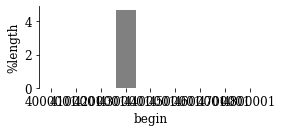

In [102]:
#y_values = np.arange(0, 100, 1)
#two_d_array = np.random.random((100,1000))
#x_1 = y_values**2
#x_2 = y_values - 17 * y_values**2
#x_3 = y_values - 57


fig = plt.figure(figsize=(17.5, 5))
fig, ax0 = plt.subplots(figsize=(8,4))

sub1 = fig.add_subplot(2,1,1)
sns.barplot(x=dfr["begin"][40:49], y=dfr["%length"][40:49] , color="lightgrey")

gs0 = ml.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=ax0)
ax1 = fig.add_subplot(gs0[0])
ax1=sns.barplot(x=dfr["begin"][30:39], y=dfr["%length"][30:39] , color="grey")

#fig, ax0 = plt.subplots(figsize=(8,4))
#sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
#ax0=sns.barplot(x=dfr["begin"][40:49], y=dfr["%length"][40:49] , color="lightgrey")

#gs0 = ml.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=ax0)
#ax1 = fig.add_subplot(gs0[0])
#ax1=sns.barplot(x=dfr["begin"][30:39], y=dfr["%length"][30:39] , color="grey")
#ax2 = fig.add_subplot(gs0[1])
#ax3 = fig.add_subplot(gs0[2])

for ax in [ax1, ax2, ax3]:
    ax.patch.set_visible(False)

#ax1.plot(x_1, y_values, color = 'k', linewidth = 4)
#ax2.plot(x_2, y_values, color = 'k', linewidth = 4)
#ax3.plot(x_3, y_values, color = 'k', linewidth = 4)


plt.show()



#fig = plt.figure(figsize=(17.5, 5))
#plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

# Create first axes, the top-left plot with green plot
#sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
#sns.barplot(x=dfr["begin"][40:49], y=dfr["%length"][40:49] , color="lightgrey")

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2) # two rows, two columns, second cell
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")

# Create third axes, a combination of third and fourth cell
#sub3 = fig.add_subplot(2,1,2)
#sub3 = fig.add_subplot(2,1,3)#(3,4)) # two rows, two colums, combined third and fourth cell


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


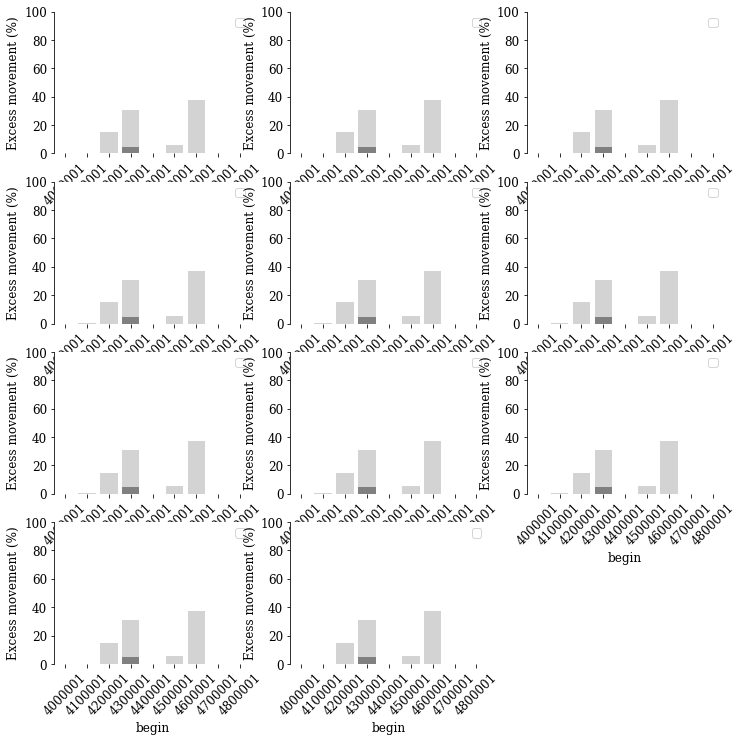

In [114]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

with PdfPages('test.pdf') as pdf:
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2*np.pi*t)
    s = s * 50

    fig = plt.figure(figsize=(12,12))
    n=0
    for i in range(11):
        n += 1
        ax = fig.add_subplot(4,3,n)
        sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
        sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
        ax.set_ylim(0, 100)
        ax.legend()
        ax.yaxis.set_label_text('Excess movement (%)')
        plt.setp(ax.xaxis.get_ticklabels(), rotation='45')
    pdf.savefig(fig)

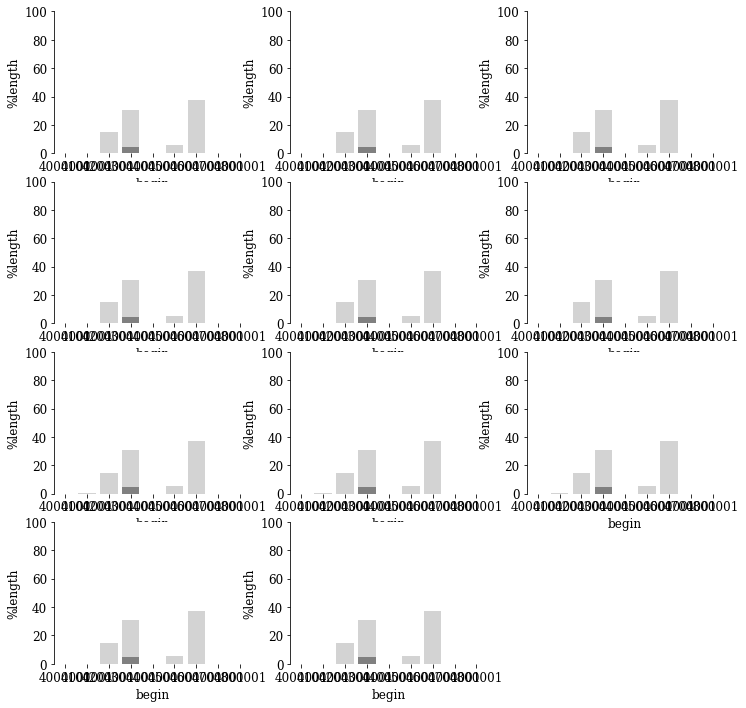

In [118]:
fig = plt.figure(figsize=(12,12))
n=0
for i in range(11):
    n += 1
    ax = fig.add_subplot(4,3,n)
    sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
    sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
    ax.set_ylim(0, 100)
    #ax.legend()
    #ax.yaxis.set_label_text('Excess movement (%)')
    #plt.setp(ax.xaxis.get_ticklabels(), rotation='45')

<AxesSubplot:xlabel='begin', ylabel='%length'>

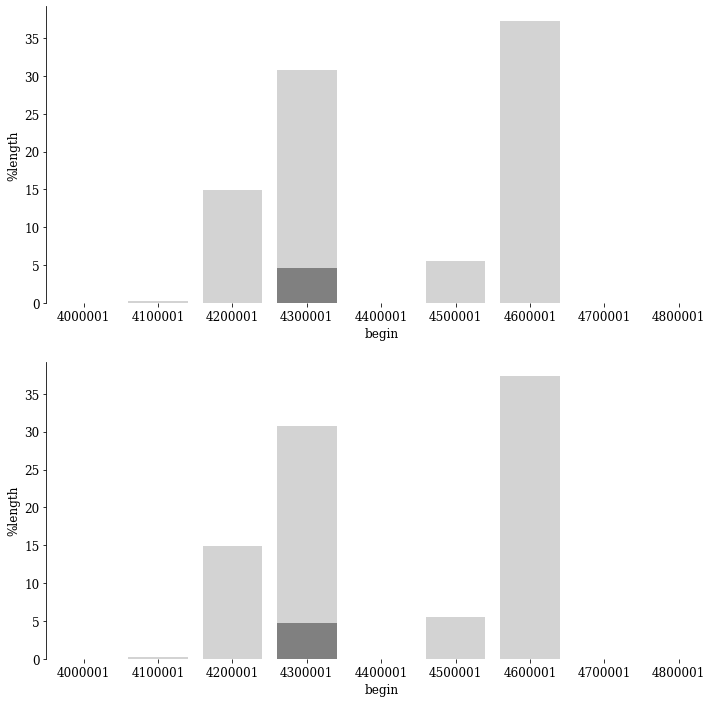

In [121]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,1)
sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
    
    
ax2 = fig.add_subplot(2,1,2)
sns.barplot(x=dfr["begin"][30:59], y=dfr["%length"][30:59] , color="lightgrey")
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")

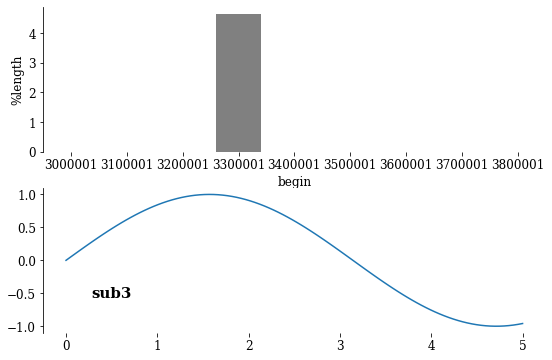

In [110]:
fig = plt.figure(figsize=(9, 6))

#x = np.linspace(0., 5., 100)
#y = np.sin(x)

rows = 2
columns = 1

x = np.linspace(0., 5., 100)
y = np.sin(x)

grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

frgr= plt.subplot(grid[0, 0])
#plt.annotate('sub1', xy = (0.5, -0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
sns.barplot(x=dfr2["begin"][40:49], y=dfr2["%length"][40:49] , color="grey")
sns.barplot(x=dfr2["begin"][30:39], y=dfr2["%length"][30:39] , color="blue")

#plt.subplot(grid[0, 1])
#plt.annotate('sub2', xy = (0.5, -0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
#plt.plot(x, y)

plt.subplot(grid[1, :])
plt.annotate('sub3', xy = (0.5, -0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
plt.plot(x, y)





fig, ax0 = plt.subplots(figsize=(8,4))
ax0.pcolormesh(two_d_array, cmap = 'seismic')
ax0.set_axis_off()

gs0 = ml.gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec=ax0)
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])
ax3 = fig.add_subplot(gs0[2])

for ax in [ax1, ax2, ax3]:
    ax.patch.set_visible(False)

ax1.plot(x_1, y_values, color = 'k', linewidth = 4)
ax2.plot(x_2, y_values, color = 'k', linewidth = 4)
ax3.plot(x_3, y_values, color = 'k', linewidth = 4)


plt.show()

NameError: name 'sb' is not defined

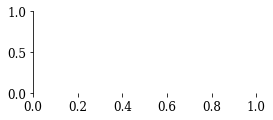

In [93]:
    fig, ax = plt.subplots()
    sb.regplot(x='round', y='money', data=firm, ax=ax)
    ax2 = ax.twinx()
    sb.regplot(x='round', y='dead', data=firm, ax=ax2, color='r')
    sb.plt.show()

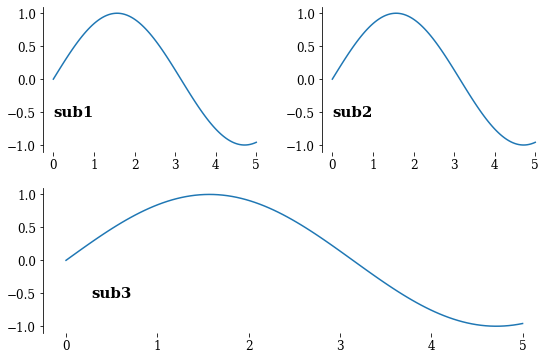

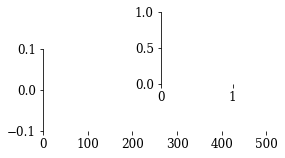

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax= plt.subplots()

inset_axes = inset_axes(ax,
                    width=1,                     # inch
                    height=1,                    # inch
                    bbox_transform=ax.transData, # data coordinates
                    bbox_to_anchor=(250,0.0),    # data coordinates
                    loc=3)                       # loc=lower left corner

ax.axis([0,500,-.1,.1])
plt.show()

In [42]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = False

## Orthogroup evolution

In [2]:
chrom = ['LR999924.1', 'LR999925.1', 'LR999925.1']

In [1]:
# create dataframe

new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

dfr=pd.DataFrame(eigve_array)
new_header = dfr.iloc[0] #grab the first row for the header
dfr = dfr[1:] #take the data less the header row
print(dfr[0])
dfr.columns = new_header
dfr = dfr.loc[ : , dfr.columns != 'chrom'].apply(pd.to_numeric, errors='coerce')
dfr = dfr[:-1]
dfr

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv'

['LR999924.1' 'LR999925.1' 'LR999926.1' 'LR999927.1' 'LR999928.1'
 'LR999929.1' 'LR999930.1' 'LR999931.1' 'LR999932.1' 'LR999933.1'
 'LR999934.1' 'LR999935.1' 'LR999936.1' 'LR999937.1' 'LR999938.1'
 'LR999939.1' 'LR999940.1' 'LR999941.1' 'LR999942.1' 'LR999943.1'
 'LR999944.1' 'LR999945.1' 'LR999946.1' 'LR999947.1' 'LR999948.1'
 'LR999949.1' 'LR999950.1' 'LR999951.1' 'LR999952.1' 'LR999953.1'
 'LR999954.1' 'LR999955.1']
#393b79
#393b79
#5254a3
#6b6ecf
#9c9ede
#637939
#8ca252
#b5cf6b
#cedb9c
#8c6d31
#bd9e39
#e7ba52
#e7cb94
#843c39
#ad494a
#d6616b
#e7969c
#7b4173
#a55194
#ce6dbd
#de9ed6
['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39', '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6']


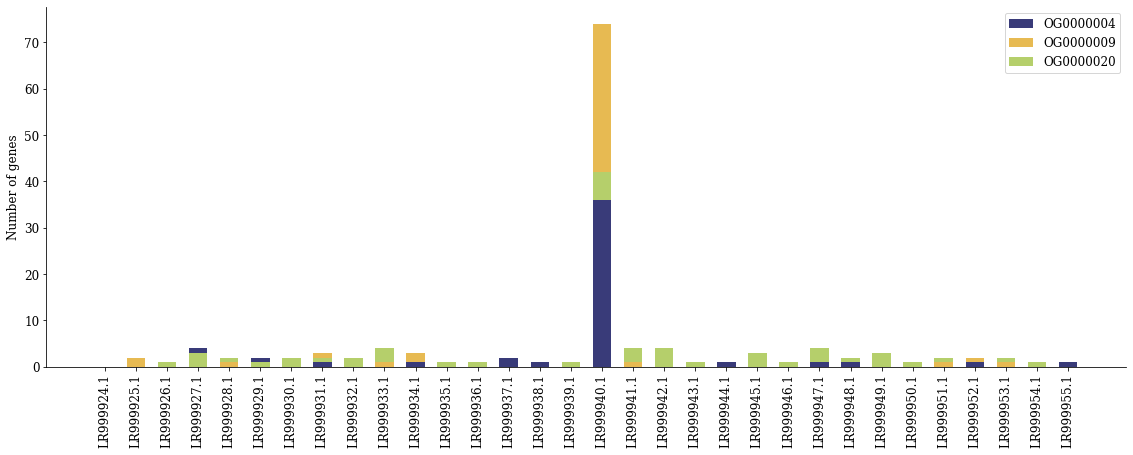

In [141]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

df=pd.DataFrame(eigve_array)
df

#print(eigve_array[0][1:])
og_names=eigve_array[0][1:]

#print(eigve_array[0:10][1])
#arr = np.array(eigve_array)
#print(arr[0:1][0:1])

#arr= np.array(dfr[0])
#N = 3

#ind = np.arange(3) # the x locations for the groups
#labels=['LR999924.1','LR999925.1','LR999926.1','LR999927.1','LR999928.1'] 


chroms= np.array(df[0][1:33])
print(chroms)
labels=chroms
#print#01019', 'OG0000231', 'OG0001542', 'OG0001328', 'OG0000081', 'OG0001548', 'OG0001331', 'OG0003727', 'OG0001974', 'OG0000600', 'OG0001817', 'OG0001329']
#OG0000231
#OG1=[1,0,0]
#color=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
#color=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#color=['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#color=['#7f3b08','#b35806','#e08214','#fdb863','#fee0b6','#f7f7f7','#d8daeb','#b2abd2','#8073ac','#542788','#2d004b']
print(color[0])


#OG0000473	OG0000082	OG0001335	OG0001019	OG0000231	OG0001542	OG0001328	OG0000081
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

#cm = plt.cm.get_cmap('Vega20c')

from pylab import *

cmap = cm.get_cmap('tab20b', 20)    # PiYG
colors=[]

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))
    colors+=[matplotlib.colors.rgb2hex(rgba)]

print(colors)
color=colors
    
width = 0.6
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, dfr['OG0000004'], width, color=color[0])
ax.bar(labels, dfr['OG0000009'], width,bottom=dfr['OG0000004'], color=color[10])
ax.bar(labels, dfr['OG0000020'], width,bottom=dfr['OG0000009'], color=color[6])




#ax.bar(labels, dfr['OG0000074'][0:5], width,bottom=dfr['OG0000020'][0:5], color=color[9])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000473'][0:5], width,bottom=dfr['OG0000072'][0:5], color=color[5])
#ax.bar(labels, dfr['OG0000082'][0:5], width,bottom=dfr['OG0000473'][0:5], color=color[2])
#ax.bar(labels, dfr['OG0001335'][0:5], width,bottom=dfr['OG0000082'][0:5], color=color[8])
#ax.bar(labels, dfr['OG0001019'][0:5], width,bottom=dfr['OG0001335'][0:5], color=color[6])
#ax.bar(labels, dfr['OG0000231'][0:5], width,bottom=dfr['OG0001019'][0:5], color=color[4])
#ax.bar(labels, dfr['OG0001542'][0:5], width,bottom=dfr['OG0000231'][0:5], color=color[7])
#ax.bar(labels, dfr['OG0001328'][0:5], width,bottom=dfr['OG0001542'][0:5], color=color[0])
#ax.bar(labels, dfr['OG0000081'][0:5], width,bottom=dfr['OG0001328'][0:5], color=color[10])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, OG3, width,bottom=df['OG0005756'], color='g')
#ax.bar(labels, OG4, width,bottom=df['OG0000473'], color='y')
ax.set_ylabel('Number of genes')#orientation=u'vertical'
ml.rcParams['figure.figsize'] = (15.0, 5.0)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))

plt.xticks(rotation=90)
ax.legend(labels=og_names)
plt.show()

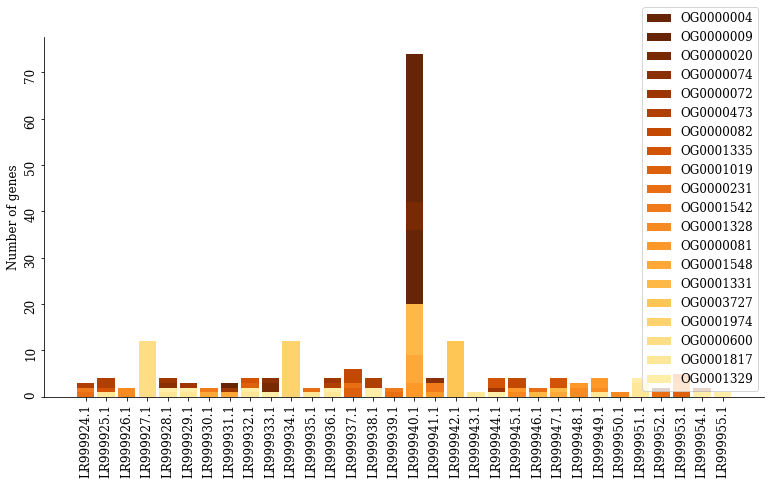

In [178]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

df=pd.DataFrame(eigve_array)
df

#print(eigve_array[0][1:])
og_names=eigve_array[0][1:]

#print(eigve_array[0:10][1])
#arr = np.array(eigve_array)
#print(arr[0:1][0:1])

#arr= np.array(dfr[0])
#N = 3

#ind = np.arange(3) # the x locations for the groups
#labels=['LR999924.1','LR999925.1','LR999926.1','LR999927.1','LR999928.1'] 


chroms= np.array(df[0][1:33])
#print(chroms)
labels=chroms
#print#01019', 'OG0000231', 'OG0001542', 'OG0001328', 'OG0000081', 'OG0001548', 'OG0001331', 'OG0003727', 'OG0001974', 'OG0000600', 'OG0001817', 'OG0001329']
#OG0000231
#OG1=[1,0,0]
#color=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
#color=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#color=['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#color=['#7f3b08','#b35806','#e08214','#fdb863','#fee0b6','#f7f7f7','#d8daeb','#b2abd2','#8073ac','#542788','#2d004b']
#print(color[0])


#OG0000473	OG0000082	OG0001335	OG0001019	OG0000231	OG0001542	OG0001328	OG0000081
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

#cm = plt.cm.get_cmap('Vega20c')

from pylab import *

cmap = cm.get_cmap('YlOrBr_r', 23)
#cmap = cm.get_cmap('Set1', 23) # PiYG
colors=[]

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    #print(matplotlib.colors.rgb2hex(rgba))
    colors+=[matplotlib.colors.rgb2hex(rgba)]

#print(colors)
color=colors
    
width = 0.85
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, dfr['OG0000004'], width, color=color[0])
for j in arange(19):
    #print(dfr[og_names[j+1]])
    ax.bar(labels, dfr[og_names[j+1]], width,bottom=dfr[og_names[j]], color=color[j])
#ax.bar(labels, dfr['OG0000009'], width,bottom=dfr['OG0000004'], color=color[10])
#ax.bar(labels, dfr['OG0000020'], width,bottom=dfr['OG0000009'], color=color[6])


#for j in arange(83):
   # ax.bar(labels, dfr[og_names[j+1]], width,bottom=dfr['OG0000004'], color=color[10])
    


#ax.bar(labels, dfr['OG0000074'][0:5], width,bottom=dfr['OG0000020'][0:5], color=color[9])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000473'][0:5], width,bottom=dfr['OG0000072'][0:5], color=color[5])
#ax.bar(labels, dfr['OG0000082'][0:5], width,bottom=dfr['OG0000473'][0:5], color=color[2])
#ax.bar(labels, dfr['OG0001335'][0:5], width,bottom=dfr['OG0000082'][0:5], color=color[8])
#ax.bar(labels, dfr['OG0001019'][0:5], width,bottom=dfr['OG0001335'][0:5], color=color[6])
#ax.bar(labels, dfr['OG0000231'][0:5], width,bottom=dfr['OG0001019'][0:5], color=color[4])
#ax.bar(labels, dfr['OG0001542'][0:5], width,bottom=dfr['OG0000231'][0:5], color=color[7])
#ax.bar(labels, dfr['OG0001328'][0:5], width,bottom=dfr['OG0001542'][0:5], color=color[0])
#ax.bar(labels, dfr['OG0000081'][0:5], width,bottom=dfr['OG0001328'][0:5], color=color[10])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, dfr['OG0000072'][0:5], width,bottom=dfr['OG0000074'][0:5], color=color[3])
#ax.bar(labels, OG3, width,bottom=df['OG0005756'], color='g')
#ax.bar(labels, OG4, width,bottom=df['OG0000473'], color='y')
ax.set_ylabel('Number of genes')#orientation=u'vertical'
ml.rcParams['figure.figsize'] = (10.0, 5.0)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          #fancybox=True, shadow=True, ncol=5)
#plt.legend(loc='best')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))


plt.xticks(rotation=90)
plt.yticks(rotation=90)
ax.legend(labels=og_names)

plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/spatial_ortho.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/spatial_ortho.png",bbox_inches="tight")

plt.show()

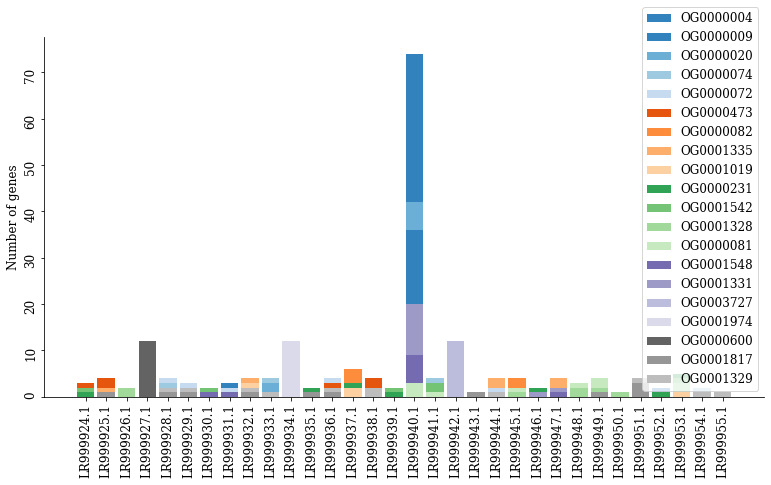

In [182]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

df=pd.DataFrame(eigve_array)
og_names=eigve_array[0][1:]
chroms= np.array(df[0][1:33])

labels=chroms

#color=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
#color=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#color=['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
#color=['#7f3b08','#b35806','#e08214','#fdb863','#fee0b6','#f7f7f7','#d8daeb','#b2abd2','#8073ac','#542788','#2d004b']

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


from pylab import *

cmap = cm.get_cmap('tab20c', 20)
#cmap = cm.get_cmap('Set1', 23) # PiYG
colors=[]

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    #print(matplotlib.colors.rgb2hex(rgba))
    colors+=[matplotlib.colors.rgb2hex(rgba)]

#print(colors)
color=colors
    
width = 0.85
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, dfr['OG0000004'], width, color=color[0])
for j in arange(19):
    #print(dfr[og_names[j+1]])
    ax.bar(labels, dfr[og_names[j+1]], width,bottom=dfr[og_names[j]], color=color[j])
ax.set_ylabel('Number of genes')#orientation=u'vertical'
ml.rcParams['figure.figsize'] = (10.0, 5.0)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
ax.legend(labels=og_names)

plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/spatial_ortho_color2.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/spatial_ortho_color2.png",bbox_inches="tight")

plt.show()

In [108]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/OrthogroupSpatialAnanlysis/Orthogroup_Abundance_top20.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

df=pd.DataFrame(eigve_array)
df

#print(eigve_array[0][1:])
og_names=eigve_array[0][1:]

#print(eigve_array[0:10][1])
arr = np.array(eigve_array)
#print(arr[0:1][0:1])

chroms= np.array(df[0][1:32])
print(chroms)
print(df[0][1:32])
#N = 3
#menMeans = (20, 35, 30, 35, 27)
#womenMeans = (25, 32, 34, 20, 25)
#ind = np.arange(3) # the x locations for the groups
#labels=['LR999924.1','LR999925.1','LR999926.1','LR999927.1','LR999928.1'] 
#labels=dfr[0]
#print(labels)

['LR999924.1' 'LR999925.1' 'LR999926.1' 'LR999927.1' 'LR999928.1'
 'LR999929.1' 'LR999930.1' 'LR999931.1' 'LR999932.1' 'LR999933.1'
 'LR999934.1' 'LR999935.1' 'LR999936.1' 'LR999937.1' 'LR999938.1'
 'LR999939.1' 'LR999940.1' 'LR999941.1' 'LR999942.1' 'LR999943.1'
 'LR999944.1' 'LR999945.1' 'LR999946.1' 'LR999947.1' 'LR999948.1'
 'LR999949.1' 'LR999950.1' 'LR999951.1' 'LR999952.1' 'LR999953.1'
 'LR999954.1']
1     LR999924.1
2     LR999925.1
3     LR999926.1
4     LR999927.1
5     LR999928.1
6     LR999929.1
7     LR999930.1
8     LR999931.1
9     LR999932.1
10    LR999933.1
11    LR999934.1
12    LR999935.1
13    LR999936.1
14    LR999937.1
15    LR999938.1
16    LR999939.1
17    LR999940.1
18    LR999941.1
19    LR999942.1
20    LR999943.1
21    LR999944.1
22    LR999945.1
23    LR999946.1
24    LR999947.1
25    LR999948.1
26    LR999949.1
27    LR999950.1
28    LR999951.1
29    LR999952.1
30    LR999953.1
31    LR999954.1
Name: 0, dtype: object


<ipython-input-108-c83cd6848526>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(eigve_array)


In [52]:
#88CCEE,#CC6677,#DDCC77,#117733,#332288,#AA4499,#44AA99,#999933,#882255,#661100,#6699CC,#888888

color=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
print(color[0])

#ffffb3


In [3]:
#OG0000231
OG1=(1,0,0)
#OG0005756
OG2=[2,0,0]
#OG0000473
OG3=[1,2,2]
#OG0000072
OG4=[1,2,2]

# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(OG1,OG2,OG3,OG4)),
               columns =['OG0000231','OG0005756','OG0000473','OG0000072'])
df['OG0000231']

0    1
1    0
2    0
Name: OG0000231, dtype: int64

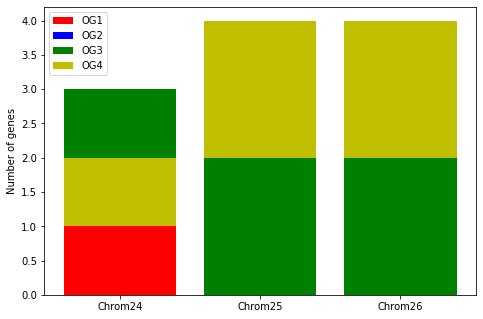

In [4]:
#N = 3
#menMeans = (20, 35, 30, 35, 27)
#womenMeans = (25, 32, 34, 20, 25)
#ind = np.arange(3) # the x locations for the groups
labels = ['Chrom24', 'Chrom25', 'Chrom26']
#OG0000231
#OG1=[1,0,0]

width = 0.8
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, OG1, width, color='r')
ax.bar(labels, OG2, width,bottom=df['OG0000231'], color='b', orientation=u'vertical')
ax.bar(labels, OG3, width,bottom=df['OG0005756'], color='g')
ax.bar(labels, OG4, width,bottom=df['OG0000473'], color='y')
ax.set_ylabel('Number of genes')#orientation=u'vertical'
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['OG1', 'OG2', 'OG3', 'OG4'])
plt.show()

#### Development

In [ ]:
cols = df3.columns.drop(df3['chrom'])
cols
df3 = df3.apply(pd.to_numeric, errors='coerce')

df3.dtypes

In [ ]:
path3="/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out"

In [ ]:
df=make_repeat_df("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out")
df3=make_repeat_df("/Users/dshipilina/GitHub/AfricanDivide/ChromLR40.repeat.out")

In [ ]:
ml.rcParams['figure.figsize'] = (13, 1.5)
sns.barplot(x=df3["begin"], y=df3["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=0)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the Z chromosome LR999924")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_24.png",bbox_inches="tight")
plt.show()

ml.rcParams['figure.figsize'] = (17, 1.5)
sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the W chromosome LR999940")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
plt.show()

#"#faab36", "#249ea0"

In [ ]:
ml.rcParams['figure.figsize'] = (17, 1.5)
sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the W chromosome LR999940")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
plt.show()

In [ ]:
def make_repeat_df(path):    
    new2 = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
    split_ = new2.split('\n')
    #print(split_[2])
    eigve2_array=[]
    #print(split_file2[2])
    for i in split_:
        ii=i.split()
        eigve2_array+=[ii]

    df=pd.DataFrame(eigve2_array)
    df.columns=['chrom','begin','end','repts']
    #df = df.drop(labels=[138], axis=0)
    df["begin"] = pd.to_numeric(df["begin"], downcast="float")
    df["repts"] = pd.to_numeric(df["repts"], downcast="float")
    df = df[:-1]
    return df

In [ ]:
def plot_repeats(df,mg_num): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
    #plt.xticks(rotation=90)
    plt.tick_params(axis='x', labelsize=1)
    #plt.xticks(" ")
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    #plt.xaxis.label.set_visible(False)
    plt.xlabel('') #"Position along the Z chromosome LR999924")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_24.png",bbox_inches="tight")
    plt.show()

In [ ]:
plot_repeats(df3,13.8)
plot_repeats(df,17)

# PCA


In [ ]:
dfx

## Dataset 1: Variants w/o singletons and doubletons 

First, PCA analysis was preformed for the data with only necessary filtering to retain maximum coverage.
Short summary of filtering:
- Input file from Aurora: `cardui_migrdiv_indv.vcf.gz`
- Maximum missing % of individuals: 0.3
- Minor allele frequency cutoff fixed to 0.006: which correspond to removing singletons only in dataset of 347 individuals 
- Variant depth set to maximum possible: 4 (see justification in Evernote)


### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

### Plotting

In [11]:
#print(df['loc'])
eigval = open("/Users/dariashipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
#eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()


df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dariashipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval'

## Dataset 1: Variants w/o singletons and doubletons, no LD

We observe distinct outliers in Southern Hemisphere, all belonging to Namibia sampling site. Such pattern, along with excessive grouping of other populations may be an effect of LD in the sample. Here we attempt to correct for LD, removing SNPs, where r^2>0.2 on 50Kb overlapping blocks (performed in plink).

### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

### Plotting

In [ ]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
sns.palplot(sns.color_palette())
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.png",bbox_inches="tight")
plt.show()

df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#sns.despine(offset=0, trim=True)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.png",bbox_inches="tight")
plt.show()

#df["alpha"] = np.where(dfnor, 0, 1)
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.show()
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA2'], y=data['PCA3'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 3 ("+ (split_eigval[2])+"%)")
plt.xlabel("PCA 2 ("+split_eigval[1]+"%)")
#sns.scatterplot(x=north['PCA1'], y=north['PCA2'], hue=north['popID'])
#north

In [ ]:
#fig_dims = (6, 6)
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.png",bbox_inches="tight")

In [ ]:
#fig_dims = (6, 6)
#sns.set_palette("muted")
 
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Location'],palette="tab10",s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['Location'], palette="tab10",s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.png",bbox_inches="tight")

In [ ]:
#fig_dims = (6, 6)
data_north=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]

ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.png",bbox_inches="tight") 
plt.show()
    
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="cubehelix",s=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.png",bbox_inches="tight")

In [ ]:
#data3=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]
df.loc[df["PCA2"] >= 0.2]
#174 158 249
df.loc[df["PCA2"] <= -0.15]

In [ ]:
data = df.drop(labels=[174,158,249], axis=0)
data_north=data.loc[(data["popID"] == "NHE")]
data_north

ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="icefire",s=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.png",bbox_inches="tight")

## Dataset 2: Rare variants, no LD (Aurora)

Here we briefly check population structure based on rare variants (MAF: 0.001-0.010, MAC: 1-4)

### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
#eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)


### Plotting

In [ ]:
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.png",bbox_inches="tight")
plt.show()

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
#dftmp2["hem"] = dftmp2['popID'] 
#dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
#remove outliers
#df = df.drop(labels=[347,241,148], axis=0)
df[0:50]

In [ ]:
#print(df['loc'])
#df = df.drop(labels=[241,148], axis=0)
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'])#,palette="dark")
#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.legend(loc='center left') #mode="expand") #loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)
plt.legend(loc='lower left')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc='lower left') #,
          #ncol=2, mode="expand", borderaxespad=0.4)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [ ]:
#Check outliers

#df['PCA1'].max()
print(df['PCA1'].idxmin(axis = 0))
print(df['PCA2'].idxmin(axis = 0))

## Dataset 3

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

In [ ]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
#sns.palplot(sns.color_palette())
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], color='grey')
sns.scatterplot(xout, yout, color='orange', s=80)#, hue=df['popID'], s=20,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (9.0, 9.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.text(df['PCA1'],df['PCA2'],"TOT", color='red')
plt.text(xout,yout,"15D327",size=16)#, color='red')
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.png",bbox_inches="tight")
plt.show()

In [ ]:
#dot labler
xout=df['PCA1'][df["FullID"]=='Namibia_15D327']
yout=df['PCA2'][df["FullID"]=='Namibia_15D327']

# ADMIXTURE

In [1]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q'

In [ ]:
ml.rcParams['figure.figsize'] = (32, 5)
#index = range(len(df4["FullID"]))
plt.bar(df4["FullID"],height=1)#,width=0.98)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("SHEA  SH   NHEA  NHE")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

In [ ]:
sns.barplot(x=df3[""], y=df4["pop1"], color='lightblue')

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# #print(df4)
# #df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# #df4.sort_values(by=["pop2"], inplace=True)
# df4.sort_values(["pop", "popID"])#, ascending = (False, True))
# #print(df)
# #df4 = df4.drop(labels=[347], axis=0)
# df4[167:190]

In [ ]:
# ml.rcParams['figure.figsize'] = (30, 5)
# #index = range(len(df4["FullID"]))
# plt.bar(df5["FullID"],height=1)#,width=0.98)
# #plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# #index = range(len(df4["FullID"]))
# #plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# sns.barplot(x=df5["FullID"], y=df5["pop1"], color='lightblue')
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=8)
# plt.rcParams['axes.spines.left'] = False
# #plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# #plt.rcParams['axes.spines.bottom'] = False
# plt.xlabel("")
# plt.ylabel("inferred allele frequences")
# index = range(len(df5["FullID"]))
# plt.xticks(index, df5["FullID"])

# # show the graph
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v5.pdf",bbox_inches="tight")
# plt.show

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# print(df4)
# df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# df4.sort_values(by=["pop2"], inplace=True)
# print(df4)
# #sns.axes_style("whitegrid")
# ml.rcParams['figure.figsize'] = (30, 5)
# plt.bar(df4["FullID"],height=1)#,width=0.98)
# plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# index = range(len(df4["FullID"]))
# plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #bar1 = sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# #bar2 = sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue',edgecolor="none")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=6)
# #plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# #plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

# #plt.show()  

# #plt.bar(df4["FullID"],height=1)

# #print(df4["pop1"])
# #tips = sns.load_dataset("tips")
# #tips
                         

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# #bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# # add legend
# #top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# #bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# #plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# #plt.show()
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_3.pdf",bbox_inches="tight")